In [5]:
# These are the normal libraries

import pandas as pd
import numpy as np

# This is just so that we don't get annoying warnings
import warnings
warnings.filterwarnings('ignore')


# This is the most common viz library in python
import matplotlib.pyplot as plt
%matplotlib inline

# This one is the above on steroids
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# These Libs are for stats
import statsmodels.api as sm
from statsmodels.formula.api import ols



train = pd.read_csv(r"C:\Users\User\Desktop\iRonhack\Classes at Iron\Project one\data_analytics_class_project_one\Project files\FIFA_TRAIN_DATA.csv", sep = '?')
test = pd.read_csv(r"C:\Users\User\Desktop\iRonhack\Classes at Iron\Project one\data_analytics_class_project_one\Project files\FIFA_TEST_DATA.csv", sep = '?')

In [6]:
pd.set_option('display.max_columns', None)
train

,Unnamed: 0,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,.

# Standartization

In [7]:
cols = []

for i in range(len(train.columns)):
    cols.append(train.columns[i].lower().replace(' ', '_'))
cols

train.columns = cols
train.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'ova', 'nationality', 'club', 'bov',
       'bp', 'position',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=108)

In [8]:
train.dtypes

unnamed:_0     int64
id             int64
name          object
age            int64
ova            int64
               ...  
cb            object
rcb           object
rb            object
gk            object
gender        object
Length: 108, dtype: object

In [9]:
train['bp'].unique()

array(['CM', 'CAM', 'CB', 'CF', 'ST', 'GK', 'CDM', 'RWB', 'LB', 'RM',
       'LM', 'LWB', 'RW', 'RB', 'LW'], dtype=object)

In [10]:
numerical = train.select_dtypes(include=[np.number])
numerical

,unnamed:_0,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
0,1,16,37,71,70,71,0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
1,2,27,33,71,71,71,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
2,4,41,36,81,82,81,0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
3,6,80,38,77,77,77,0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,44,71,83,77,62,66
4,7,241,39,78,78,78,0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,60,72,85,77,41,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,17117,259083,18,58,61,77,19,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,52,85.0,242,47,62.0,51,45,37,219,45,25.0,47.0,57.0,45,55.0,119,42,38,39.0,56,12,9,12,10,13,1498,323,75,44,55,65,37,47
13696,17118,259084,19,54,56,68,14,223,30,55,52,43,43.0,199,50,38.0,30,29,52,303,66,67,62.0,50,58.0,290,53,67.0,57,65,48,221,46,22.0,53.0,45.0,55,50.0,65,24,19,22.0,50,7,11,6,12,14,1351,294,67,53,38,52,25,59
13697,17119,259085,19,60,60,72,12,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,60,61,60,65,24,59
13698,17121,259090,18,56,58,66,10,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55


In [11]:
train.describe()

,unnamed:_0,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13656.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13693.000000,13693.000000,13656.000000,13700.000000,13371.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,66.945912,67.872555,72.455839,5.509927,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,266.382993,57.784964,49.576377,44.389124,54.205620,60.586131,322.597007,65.410365,65.429051,64.578134,62.912117,64.682484,302.159343,59.747810,65.067223,63.222190,65.215328,49.115766,261.734891,56.938686,46.901848,52.397868,55.463459,50.261898,59.920051,140.876934,47.042774,48.094818,45.886716,78.039343,15.685620,15.561825,15.548175,15.597956,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219
std,4954.144383,37445.343736,4.944498,6.860189,6.635216,5.763664,5.797176,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,77.062358,18.097397,18.213576,17.541672,14.893823,15.946896,55.200803,14.715545,14.482221,14.455742,9.015661,14.106680,49.586804,13.453344,11.973828,15.365887,12.727425,19.085820,63.144215,17.075547,20.813064,19.120347,13.704294,15.740524,11.756363,61.588754,20.190705,21.479614,21.194014,81.789044,16.960759,16.260312,16.086613,16.524135,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964
min,1.000000,16.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,22.000000,11.000000,20.000000,4.000000,55.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000
25%,4269.750000,203979.750000,21.000000,62.000000,64.000000,69.000000,0.000000,231.000000,41.000000,33.000000,45.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,271.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,83.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1491.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,8555.500000,228927.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,56.000000,63.000000,47.000000,279.000000,63.000000,52.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,66.000000,54.000000,270.000000,60.000000,52.000000,57.000000,57.000000,52.000000,61.000000,157.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11

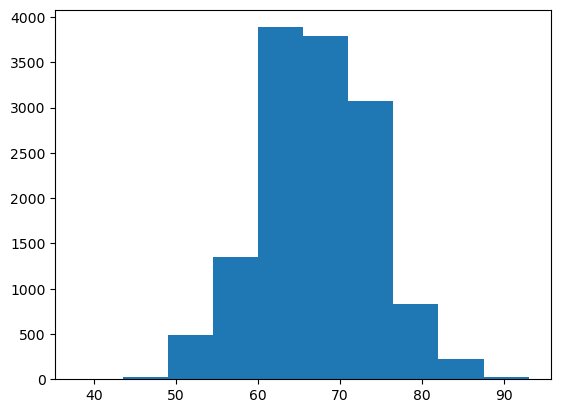

In [12]:
plt.hist(train['ova'])


plt.show()

In [13]:
train['ir'].unique()

array(['1 ★', '2 ★', '4 ★', '3 ★', '5 ★'], dtype=object)

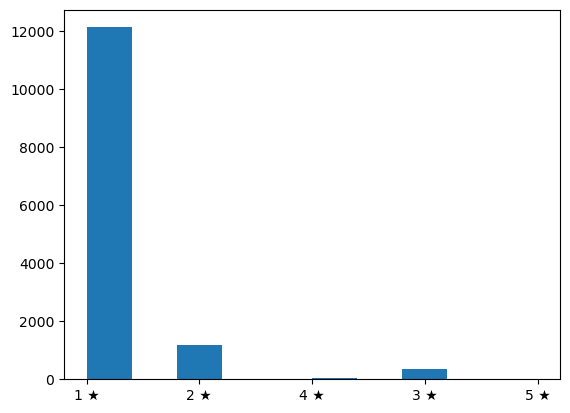

In [14]:
plt.hist(train['ir'])


plt.show()

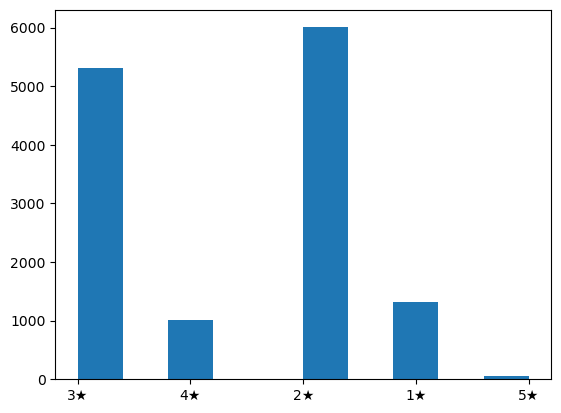

In [15]:
plt.hist(train['sm'])


plt.show()

# Correlation

In [16]:
correlations_matrix = numerical.corr()
correlations_matrix

,unnamed:_0,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
unnamed:_0,1.000000,0.831183,-0.790843,-0.556703,-0.507759,0.075740,0.734086,-0.238629,-0.208311,-0.153996,-0.189678,-0.234986,-0.242281,-0.240579,-0.117563,-0.250123,-0.281290,-0.280362,-0.189580,-0.036204,0.098178,0.092124,-0.055605,-0.535242,0.013750,-0.359992,-0.362943,-0.227048,-0.114573,-0.320520,-0.249105,-0.311999,-0.283603,-0.203652,-0.170693,-0.303697,-0.227620,-0.480560,-0.123436,-0.169755,-0.114969,-0.091944,-0.098324,-0.094977,-0.098770,-0.107476,-0.104529,-0.096217,-0.348730,-0.483972,0.091575,-0.344211,-0.452371,-0.326573,-0.229708,-0.419012
id,0.831183,1.000000,-0.745955,-0.432247,-0.386260,0.046779,0.558015,-0.181484,-0.154190,-0.112917,-0.152759,-0.177445,-0.207549,-0.179355,-0.062399,-0.202477,-0.238952,-0.215934,-0.139223,0.063728,0.171039,0.174859,0.024702,-0.425031,0.042675,-0.226996,-0.281964,-0.143789,0.017393,-0.246867,-0.188659,-0.246572,-0.223761,-0.157430,-0.127528,-0.250700,-0.215447,-0.423265,-0.073556,-0.110071,-0.075383,-0.056921,-0.090747,-0.084442,-0.095197,-0.115401,-0.101800,-0.089393,-0.238416,-0.334938,0.184321,-0.283240,-0.367248,-0.228548,-0.166261,-0.293212
age,-0.790843,-0.745955,1.000000,0.519422,0.459247,-0.239894,-0.853173,0.187466,0.154740,0.105448,0.176961,0.182292,0.189094,0.172790,0.040179,0.183681,0.229586,0.228216,0.124731,-0.055051,-0.186313,-0.178995,-0.043541,0.504549,-0.087245,0.313088,0.306849,0.197871,0.069939,0.350687,0.194136,0.274718,0.277885,0.196707,0.122385,0.241624,0.197082,0.423551,0.119275,0.159890,0.110770,0.089251,0.121982,0.117358,0.121124,0.125876,0.130267,0.117866,0.283718,0.415849,-0.178213,0.307924,0.400467,0.238996,0.226863,0.435799
ova,-0.556703,-0.432247,0.519422,1.000000,0.985851,0.590225,-0.596555,0.426562,0.383847,0.299406,0.300648,0.488475,0.358715,0.437090,0.344376,0.397193,0.366955,0.477463,0.425601,0.301413,0.143530,0.153810,0.225468,0.869824,0.100457,0.544295,0.535906,0.258653,0.331583,0.338124,0.387717,0.489714,0.379272,0.302872,0.335959,0.508012,0.312605,0.703798,0.246659,0.286554,0.236553,0.208556,0.041994,0.040596,0.041592,0.041745,0.048267,0.041220,0.604432,0.832967,0.204044,0.487336,0.700421,0.643046,0.344292,0.543247
bov,-0.507759,-0.386260,0.459247,0.985851,1.000000,0.625775,-0.544466,0.460280,0.397712,0.333033,0.331101,0.529385,0.384925,0.469534,0.382530,0.417620,0.385147,0.510250,0.466074,0.334833,0.179779,0.190064,0.254990,0.869813,0.128787,0.571400,0.553504,0.264160,0.365693,0.335397,0.417572,0.518540,0.396997,0.317223,0.364729,0.530559,0.336612,0.720307,0.266159,0.306338,0.256517,0.226825,-0.005076,-0.006254,-0.004956,-0.003318,0.002635,-0.005121,0.632411,0.830719,0.215900,0.479781,0.690847,0.640240,0.348972,0.535810
pot,0.075740,0.046779,-0.239894,0.590225,0.625775,1.000000,0.295766,0.226131,0.205462,0.168627,0.128812,0.309974,0.171142,0.257022,0.258018,0.214868,0.158855,0.272660,0.284309,0.257688,0.198636,0.197245,0.189867,0.468900,0.130601,0.217194,0.267188,0.074104,0.165962,0.029079,0.185648,0.235472,0.133656,0.136704,0.188101,0.300909,0.141657,0.363957,0.133406,0.139910,0.133799,0.125329,-0.000191,-0.000710,0.001309,0.004140,0.002878,0.002283,0.322796,0.473964,0.264298,0.246148,0.392592,0.446200,0.166436,0.159323
growth,0.734086,0.558015,-0.853173,-0.596555,-0.544466,0.295766,1.000000,-0.279956,-0.249958,-0.186655,-0.227710,-0.269864,-0.253624,-0.261703,-0.150997,-0.255724,-0.276307,-0.293931,-0.220977,-0.100484,0.027638,0.014090,-0.077972,-0.563132,0.010788,-0.428163,-0.368530,-0.231664,-0.227381,-0.371214,-0.2742

In [17]:
# reaction correlation really high - 

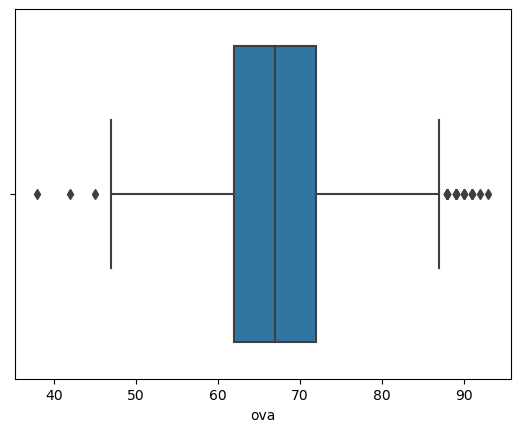

In [18]:
sns.boxplot(x=train['ova'], data=train)
plt.show()

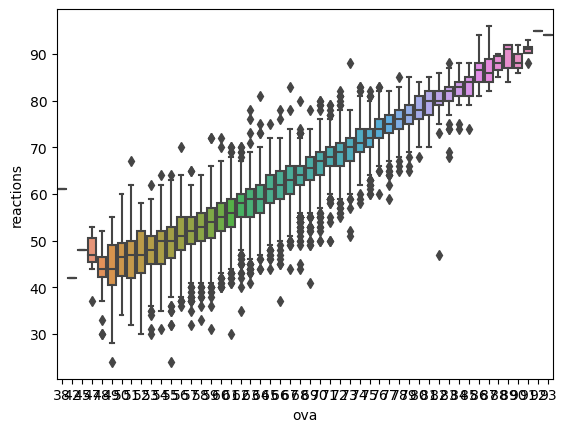

In [19]:
sns.boxplot(x=train['ova'], y = train['reactions'], data=train)
plt.show()

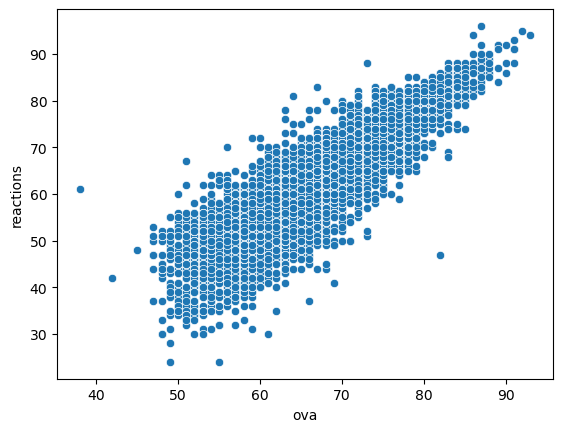

In [20]:
sns.scatterplot(x=train['ova'], y = train['reactions'], data=train)
plt.show()

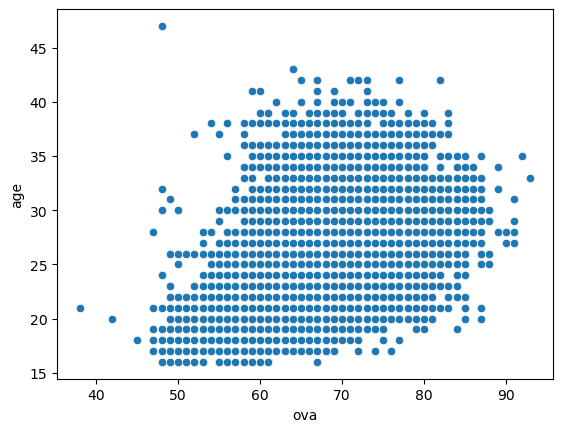

In [21]:
sns.scatterplot(x=train['ova'], y = train['age'], data=train)
plt.show()

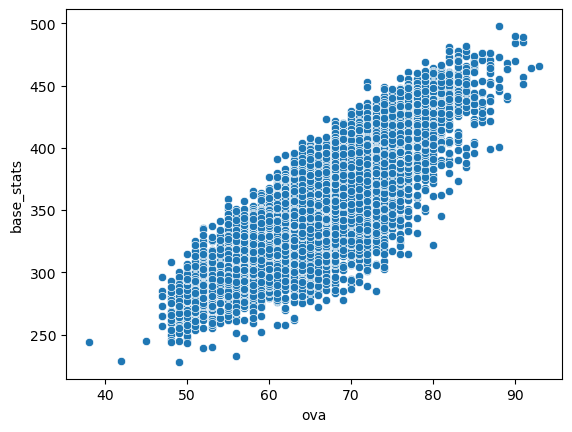

In [22]:
sns.scatterplot(x=train['ova'], y = train['base_stats'], data=train)
plt.show()

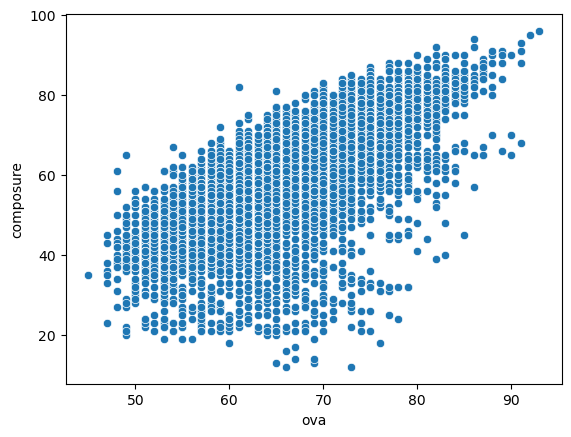

In [23]:
sns.scatterplot(x=train['ova'], y = train['composure'], data=train)
plt.show()

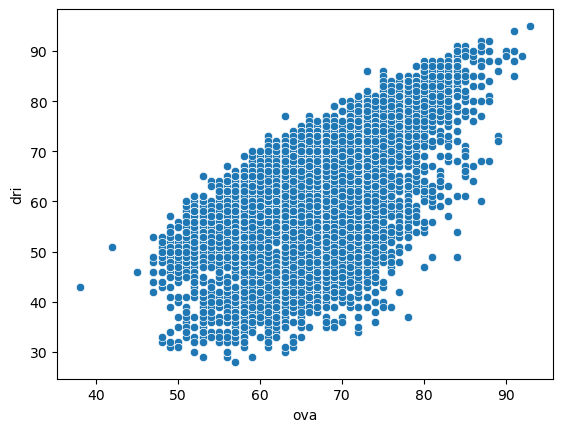

In [24]:
sns.scatterplot(x=train['ova'], y = train['dri'], data=train)
plt.show()

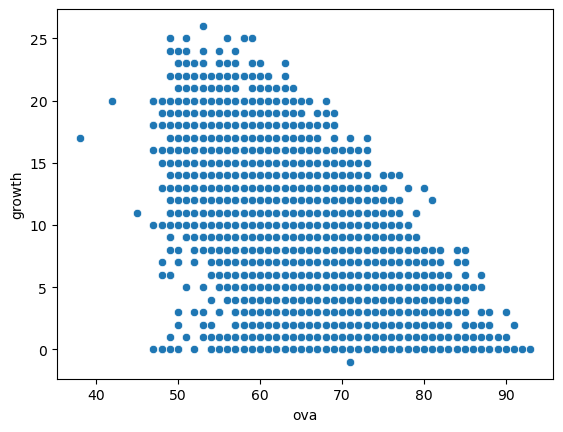

In [25]:
sns.scatterplot(x=train['ova'], y = train['growth'], data=train)
plt.show()

Adding high correlated variables to new df - correlated_variables

In [26]:
correlated_variables = train[['ova', 'age', 'growth', 'power', 'reactions', 'shot_power', 'mentality', 'vision', 'composure', 'base_stats', 'total_stats', 'pas', 'dri', 'phy']]

In [27]:
correlations_matrix_one = correlated_variables.corr()
correlations_matrix_one

,ova,age,growth,power,reactions,shot_power,mentality,vision,composure,base_stats,total_stats,pas,dri,phy
ova,1.000000,0.519422,-0.596555,0.544295,0.869824,0.535906,0.489714,0.508012,0.703798,0.832967,0.604432,0.700421,0.643046,0.543247
age,0.519422,1.000000,-0.853173,0.313088,0.504549,0.306849,0.274718,0.241624,0.423551,0.415849,0.283718,0.400467,0.238996,0.435799
growth,-0.596555,-0.853173,1.000000,-0.428163,-0.563132,-0.368530,-0.345401,-0.301253,-0.468269,-0.514482,-0.394335,-0.438532,-0.317339,-0.484459
power,0.544295,0.313088,-0.428163,1.000000,0.545654,0.765567,0.823424,0.606533,0.708630,0.570929,0.865483,0.354981,0.328701,0.516835
reactions,0.869824,0.504549,-0.563132,0.545654,1.000000,0.512646,0.524796,0.513979,0.692808,0.743506,0.604479,0.624474,0.568168,0.493493
shot_power,0.535906,0.306849,-0.368530,0.765567,0.512646,1.000000,0.622629,0.676931,0.630885,0.595069,0.699354,0.555720,0.552476,0.207692
mentality,0.489714,0.274718,-0.345401,0.823424,0.524796,0.622629,1.000000,0.729341,0.751549,0.511311,0.947469,0.405113,0.302481,0.307752
vision,0.508012,0.241624,-0.301253,0.606533,0.513979,0.676931,0.729341,1.000000,0.668909,0.629117,0.767811,0.721299,0.655597,0.048600
composure,0.703798,0.423551,-0.468269,0.708630,0.692808,0.630885,0.751549,0.668909,1.000000,0.615321,0.787754,0.538265,0.473123,0.356874
base_stats,0.832967,0.415849,-0.514482,0.570929,0.743506,0.595069,0.511311,0.629117,0.615321,1.000000,0.674092,0.849705,0.801381,0.490126


# categorical

In [28]:
categorical = train.select_dtypes(exclude='number')

In [29]:
categorical

,name,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,joined,loan_date_end,value,wage,release_clause,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,4 ★,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,4 ★,4★,Medium,Low,2 ★,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,4 ★,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,E. Belözoğlu,Turkey,Fenerbahçe SK,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,4 ★,4★,Medium,Medium,2 ★,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,R. Giggs,Wales,Manchester United,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,2 ★,3★,Medium,Medium,3 ★,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,S. Diarrassouba,Burkina Faso,FC St. Gallen,RM,CAM LM,https://cdn.sofifa.com/players/259/083/20_120.png,https://cdn.sofifa.com/teams/898/light_60.png,https://cdn.sofifa.com/flags/bf.png,FC St. Gallen 2020 ~ 2021,"5'5""",123lbs,Right,"Sep 28, 2020",NaN,€250K,€900,€519K,2020 ~ 2021,2 ★,3★,High,Medium,1 ★,9,52+2,52+2,52+2,58+0,57+0,57+0,57+0,58+0,58+2,58+2,58+2,59+2,54+2,54+2,54+2,59+2,50+2,48+2,48+2,48+2,50+2,48+2,43+2,43+2,43+2,48+2,16+2,Male
13696,R. Shanley,Scotland,Hibernian,ST,ST,https://cdn.sofifa.com/players/259/084/20_120.png,https://cdn.sofifa.com/teams/81/light_60.png,https://cdn.sofifa.com/flags/gb-sct.png,Hibernian 2018 ~ 2022,"6'1""",161lbs,Right,"Jul 1, 2018",NaN,€150K,€900,€356K,2018 ~ 2022,3 ★,2★,Medium,Medium,1 ★,3,54+2,54+2,54+2,51+0,52+0,52+0,52+0,51+0,50+2,50+2,50+2,49+2,43+2,43+2,43+2,49+2,39+2,36+2,36+2,36+2,39+2,38+2,37+2,37+2,37+2,38+2,15+2,Male
13697,F. Tapia,Mexico,Club América,GK,GK,https://cdn.sofifa.com/players/259/085/20_120.png,https://cdn.sofifa.com/teams/1879/light_60.png,https://cdn.sofifa.com/flags/mx.png,Club América 2020 ~ 2022,"6'1""",174lbs,Right,"Jul 1, 2020",NaN,€300K,€2K,€570K,2020 ~ 2022,2 ★,1★,Medium,Medium,1 ★,9,20+2,20+2,20+2,19+0,21+0,21+0,21+0,19+0,23+2,23+2,23+2,21+2,25+2,25+2,25+2,21+2,22+2,26+2,26+2,26+2,22+2,22+2,27+2,27+2,27+2,22+2,5

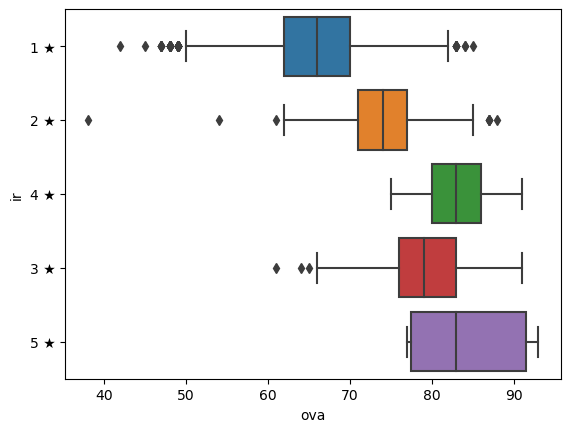

In [30]:
sns.boxplot(x=train['ova'], y = train['ir'], data=train)
plt.show()

# Categorical useful to useful numeric

In [31]:
# values
# making values and ir numeric so that we can use it in regeression 

In [32]:
categorical['value']

categorical['value'] = categorical['value'].str.replace('€', '')
categorical['value'] = categorical['value'].str.replace('M', ' * 1000000')
categorical['value'] = categorical['value'].str.replace('K', ' * 1000')
categorical['value'] = categorical['value'].map(pd.eval).astype(float)

In [33]:
categorical['value'].dtype

dtype('float64')

In [34]:
values_floats = categorical['value']

correlated_variables = pd.concat([correlated_variables, values_floats.rename("values")], axis=1)


In [35]:
# ir

In [36]:
categorical['ir']
categorical['ir'] = categorical['ir'].str.replace('★', '')

In [37]:
ir_ints = categorical['ir']

correlated_variables = pd.concat([correlated_variables, ir_ints.rename("ir")], axis=1)

In [38]:
correlated_variables 

,ova,age,growth,power,reactions,shot_power,mentality,vision,composure,base_stats,total_stats,pas,dri,phy,values,ir
0,71,37,0,324,65,75,362,73.0,79.0,385,1906,73,69,63,600000.0,1
1,71,33,0,284,59,72,317,74.0,NaN,354,1770,76,77,52,1100000.0,2
2,81,36,0,297,75,67,370,93.0,89.0,420,2014,85,85,59,5500000.0,4
3,77,38,0,340,70,77,384,85.0,80.0,403,2017,83,77,66,2800000.0,2
4,78,39,0,310,76,71,358,83.0,NaN,392,1939,85,77,57,1000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58,18,19,242,52,47,219,57.0,55.0,323,1498,55,65,47,250000.0,1
13696,54,19,14,290,50,53,221,45.0,50.0,294,1351,38,52,59,150000.0,1
13697,60,19,12,197,45,45,122,55.0,40.0,329,1023,60,65,59,300000.0,1
13698,56,18,10,271,54,51,259,53.0,46.0,319,1529,57,56,55,130000.0,1


# linear Regression

In [39]:
# apply linear regression on the following data

Y = correlated_variables['ova']
X = correlated_variables['reactions']

# The linear model has the formula Y = a * X + b, with 'add_constant' we force the model
# to have an intercept because by default on statsmodel library the `linear models`
# doesn't have intercept!!!
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 4.258e+04
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:40:31   Log-Likelihood:                -36142.
No. Observations:               13700   AIC:                         7.229e+04
Df Residuals:                   13698   BIC:                         7.230e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3065      0.204    124.139      0.000      24.907      25.706
reactions      0.6619      0.003    206.345      0.000       0.656       0.668
==============================================================================
Omnibus:                      420.257   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.721
Skew:                          -0.097   Prob(JB):                    8.51e-233
Kurtosis:                       4.355   Cond. No.                         448.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

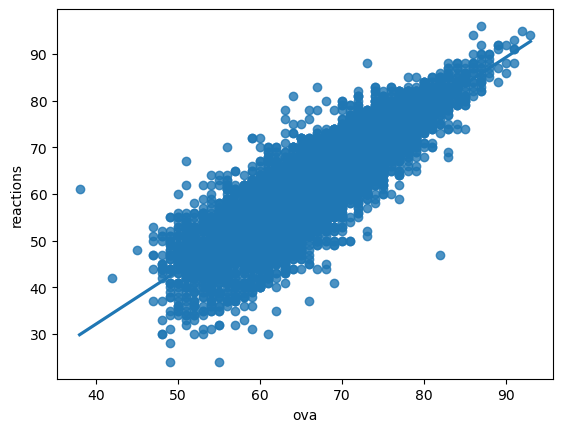

In [40]:
sns.regplot(x="ova", y="reactions", data=correlated_variables);

In [41]:
correlated_variables_without_nan = correlated_variables.dropna()
correlated_variables_without_nan

,ova,age,growth,power,reactions,shot_power,mentality,vision,composure,base_stats,total_stats,pas,dri,phy,values,ir
0,71,37,0,324,65,75,362,73.0,79.0,385,1906,73,69,63,600000.0,1
2,81,36,0,297,75,67,370,93.0,89.0,420,2014,85,85,59,5500000.0,4
3,77,38,0,340,70,77,384,85.0,80.0,403,2017,83,77,66,2800000.0,2
8,80,35,0,363,83,81,343,82.0,86.0,407,1974,75,82,69,5500000.0,2
19,82,42,0,243,80,56,150,50.0,70.0,429,1292,74,78,91,2200000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58,18,19,242,52,47,219,57.0,55.0,323,1498,55,65,47,250000.0,1
13696,54,19,14,290,50,53,221,45.0,50.0,294,1351,38,52,59,150000.0,1
13697,60,19,12,197,45,45,122,55.0,40.0,329,1023,60,65,59,300000.0,1
13698,56,18,10,271,54,51,259,53.0,46.0,319,1529,57,56,55,130000.0,1


In [42]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = correlated_variables_without_nan['ova']
X = correlated_variables_without_nan.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.89
The intercept of the model is =  22.074148305961657
The coefficients of the model are =  [-1.48019229e-02 -1.27854213e-01 -2.63799053e-02  2.64857584e-01
  3.40110944e-02 -1.95647322e-02 -5.60647328e-02  1.00511554e-01
  1.39732039e-02  8.04703759e-03  3.92506984e-02  9.57688089e-02
  1.50419515e-01  2.04550988e-07  4.38503654e-01]
The mse of the model is =  5.159181999562776
The root mse of the model is =  2.2713832788771637
The mean absolute error of the model is =  1.768599070725209


# Splitting the df according to possitions - experimentations

In [43]:
train

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,.

In [44]:
condition = train['bp'] != 'GK'
without_gk = train[condition]
without_gk

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,.

In [45]:
# trying to seperate this 2 types of data

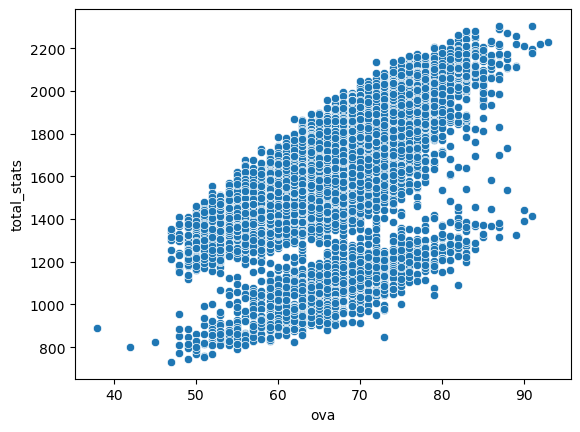

In [46]:
sns.scatterplot(x=train['ova'], y = train['total_stats'], data=train)
plt.show()

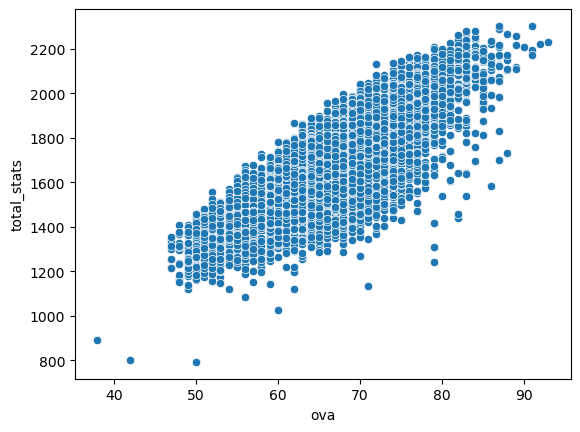

In [47]:
sns.scatterplot(x=without_gk['ova'], y = train['total_stats'], data=train)
plt.show()

# Separate model for not golkeepers

In [48]:
correlated_variables_without_gk = without_gk[['ova', 'age', 'growth', 'power', 'reactions', 'attacking', 'crossing',
 'finishing', 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle', 'mentality', 'vision', 'composure', 'pas', 'dri', 'phy']]

In [49]:
correlated_variables_without_gk_without_nan = correlated_variables_without_gk.dropna()
correlated_variables_without_gk_without_nan

,ova,age,growth,power,reactions,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,mentality,vision,composure,pas,dri,phy
0,71,37,0,324,65,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,362,73.0,79.0,73,69,63
2,81,36,0,297,75,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,370,93.0,89.0,85,85,59
3,77,38,0,340,70,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,384,85.0,80.0,83,77,66
8,80,35,0,363,83,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,343,82.0,86.0,75,82,69
22,80,39,0,337,79,386,83,81,42,90,90.0,423,82,75.0,90,85,91,275,43,34,59.0,60.0,337,88,34.0,54,75,86,350,69,24.0,80.0,91.0,86,85.0,48,14,24,10.0,350,91.0,85.0,87,81,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13694,51,17,19,235,51,212,37,38,46,57,34.0,236,50,40.0,40,53,53,324,63,65,60.0,85.0,235,55,56.0,56,27,41,239,54,42.0,54.0,47.0,42,48.0,127,36,46,45.0,239,47.0,48.0,49,54,41
13695,58,18,19,242,52,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,85.0,242,47,62.0,51,45,37,219,45,25.0,47.0,57.0,45,55.0,119,42,38,39.0,219,57.0,55.0,55,65,47
13696,54,19,14,290,50,223,30,55,52,43,43.0,199,50,38.0,30,29,52,303,66,67,62.0,58.0,290,53,67.0,57,65,48,221,46,22.0,53.0,45.0,55,50.0,65,24,19,22.0,221,45.0,50.0,38,52,59
13698,56,18,10,271,54,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,259,53.0,46.0,57,56,55


In [50]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = correlated_variables_without_gk_without_nan['ova']
X = correlated_variables_without_gk_without_nan.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.89
The intercept of the model is =  14.516368022664892
The coefficients of the model are =  [-1.08636031e-02 -1.05489661e-01 -4.00684713e+09  1.86235226e+08
 -2.01781924e+09  2.01781924e+09  2.01781924e+09  2.01781924e+09
  2.01781924e+09  2.01781924e+09 -1.51350073e+09  1.51350073e+09
  1.51350073e+09  1.51350073e+09  1.51350073e+09  1.51350073e+09
 -1.86235226e+08  1.86235226e+08  1.86235226e+08  1.86235226e+08
  1.86235226e+08  4.15857298e+09 -1.51725848e+08 -1.51725848e+08
 -1.51725848e+08 -1.51725848e+08 -1.51725848e+08  1.13594036e+08
 -6.30764059e+08 -6.30764060e+08 -6.30764060e+08  5.15159827e+07
 -6.30764059e+08  1.75491609e+04 -1.41782068e+09  1.41782068e+09
  1.41782068e+09  1.41782068e+09  5.17170023e+08 -6.82280042e+08
 -1.75490422e+04 -3.84040035e-03 -8.71773921e-02 -3.05095762e-03]
The mse of the model is =  4.859226106987309
The root mse of the model is =  2.2043652390171893
The mean absolute error of the model is =  1.732708445669653


# Seperate model for Goalkeepers

In [51]:
condition = train['bp'] == 'GK'
only_gk = train[condition]
only_gk

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
13,18,684,M. Schwarzer,42,73,Australia,Leicester City,73,GK,NaN,https://cdn.sofifa.com/players/000/684/16_120.png,https://cdn.sofifa.com/teams/95/light_60.png,https://cdn.sofifa.com/flags/au.png,73,Leicester City 2015 ~ 2016,"6'4""",209lbs,Right,0,"Jan 6, 2015",NaN,€500K,€15K,€0,2015 ~ 2016,79,13,11,14,24,17.0,78,13,14.0,11,23,17,204,23,26,36.0,76,43.0,191,29,55.0,19,70,18,146,40,22.0,19.0,31.0,34,NaN,56,17,19,20.0,357,70,73,67,78,69,1111,382,3 ★,1★,Medium,Medium,2 ★,70,73,67,69,25,78,3,25+0,25+0,25+0,23+0,24+0,24+0,24+0,23+0,25+0,25+0,25+0,23+0,26+0,26+0,26+0,23+0,24+0,28+0,28+0,28+0,24+0,24+0,30+0,30+0,30+0,24+0,73+0,Male
19,26,1179,G. Buffon,42,82,Italy,Juventus,82,GK,GK,https://cdn.sofifa.com/players/001/179/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/it.png,82,Juventus 2019 ~ 2021,"6'4""",203lbs,Right,0,"Jul 4, 2019",NaN,€2.2M,€41K,€3.6M,2019 ~ 2021,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80,49.0,243,56,71.0,34,69,13,150,38,28.0,12.0,50.0,22,70.0,35,13,11,11.0,396,77,76,74,91,78,1292,429,2 ★,1★,Medium,Medium,4 ★,77,76,74,78,33,91,154,31+3,31+3,31+3,30+0,33+0,33+0,33+0,30+0,34+3,34+3,34+3,32+3,35+3,35+3,35+3,32+3,28+3,33+3,33+3,33+3,28+3,26+3,29+3,29+3,29+3,26+3,80+2,Male
27,38,1747,G. Coupet,37,75,France,Paris Saint-Germain,75,GK,GK,https://cdn.sofifa.com/players/001/747/11_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/fr.png,83,Paris Saint-Germain 2009 ~ 2011,"5'11""",176lbs,Right,8,"Jan 1, 2009",NaN,€0,€0,€0,2009 ~ 2011,76,11,11,12,28,14.0,89,14,10.0,10,27,28,230,36,41,33.0,65,55.0,208,22,72.0,41,63,10,132,36,22.0,11.0,32.0,31,NaN,38,13,13,12.0,376,75,77,73,78,73,1149,415,3 ★,1★,NaN,NaN,3 ★,75,77,73,73,39,78,4,25+0,25+0,25+0,27+0,25+0,25+0,25+0,27+0,24+0,24+0,24+0,27+0,28+0,28+0,28+0,27+0,24+0,29+0,29+0,29+0,24+0,25+0,28+0,28+0,28+0,25+0,75+0,Male
31,43,2196,R. Weidenfeller,36,75,Germany,Borussia Dortmund,74,GK,GK,https://cdn.sofifa.com/players/002/196/18_120.png,https://cdn.sofifa.com/teams/22/light_60.png,https://cdn.sofifa.com/flags/de.png,75,Borussia Dortmund 2002 ~ 2018,"6'3""",198lbs,Left,0,"Jul 28, 2002",NaN,€900K,€20K,€1.5M,2002 ~ 2018,84,14,11,17,31,11.0,75,12,14.0,10,20,19,182,20,24,28.0,74,36.0,209,25,69.0,28,76,11,108,38,13.0,8.0,32.0,17,62.0,46,11,17,18.0,354,70,76,50,81,77,1058,376,1 ★,1★,Medium,Medium,2 ★,70,76,50,77,22,81,5,24+1,24+1,24+1,22+0,23+0,23+0,23+0,22+0,24+1,24+1,24+1,23+1,26+1,26+1,26+1,23+1,23+1,27+1,27+1,27+1,23+1,23+1,28+1,28+1,28+1,23+1,74+1,Male
41,56,3712,Dida,39,75,Brazil,Internacional,75,GK,GK,https://cdn.sofifa.com/players/003/712/14_120.png,https://cdn.sofifa.com/teams/1048/light_60.png,https://cdn.sofifa.com/flags/br.png,75,Internacional 2013 ~ 2015,"6'5""",187lbs,Left,0,"Dec 26, 2013",NaN,€0,€30K,€0,2013 ~ 2015,123,25,25,25,23,25.0,123,25,25.0,25,22,26,234,50,30,59.0,66,29.0,218,25,71.0,33,64,25,131,35,25.0,25.0,25.0,21,NaN,75,25,25,25.0,370,75,74,67,82,72,1274,409,2 ★,1★,Medium,Medium,1 ★,75,74,67,72,39,82,4,32+0,32+0,32+0,31+0,30+0,30+0,30+0,31+0,30+0,30+0,30+0,30+0,28+0,28+0,28+0,30+0,30+0,32+0,32+0,32+0,30+0,30+0,34+0,34+0,34+0,30+0,75+0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,

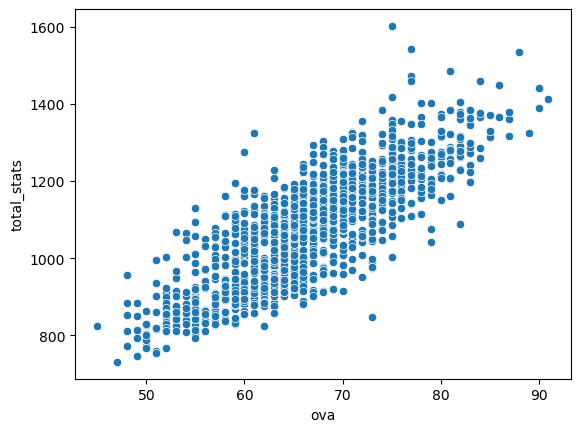

In [52]:
sns.scatterplot(x=only_gk['ova'], y = only_gk['total_stats'], data=train)
plt.show()

# Regression model for gk

In [53]:
correlated_variables_only_gk = only_gk[['ova', 'age', 'growth', 'power', 'gk_reflexes', 'gk_positioning', 'gk_kicking', 'gk_handling', 'gk_diving', 'goalkeeping', 'reactions', 'shot_power', 'mentality', 'vision', 'composure', 'pas', 'dri', 'phy']]

In [54]:
correlated_variables_only_gk_without_nan = correlated_variables_only_gk.dropna()
correlated_variables_only_gk_without_nan

,ova,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
19,82,42,0,243,78,91,74,76,77,396,80,56,150,50.0,70.0,74,78,91
31,75,36,0,209,77,81,50,76,70,354,74,25,108,32.0,62.0,50,77,81
52,79,38,0,246,77,83,60,73,82,375,74,45,147,62.0,70.0,60,77,83
84,64,38,0,198,62,64,63,64,63,316,59,47,119,37.0,48.0,63,62,64
95,69,36,0,214,65,71,74,67,66,343,74,25,126,40.0,64.0,74,65,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,61,21,9,217,62,57,58,60,64,301,59,44,99,38.0,44.0,58,62,57
13635,51,18,16,177,51,49,50,49,51,250,47,38,89,35.0,30.0,50,51,49
13651,49,19,16,175,54,48,46,48,50,246,31,35,83,27.0,28.0,46,54,48
13675,58,19,11,169,56,60,57,59,59,291,49,43,109,44.0,26.0,57,56,60


In [55]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = correlated_variables_only_gk_without_nan['ova']
X = correlated_variables_only_gk_without_nan.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  0.6742195914001883
The coefficients of the model are =  [-0.00300685  0.00813531  0.00016995  0.03133416  0.03374069 -0.04662744
  0.06333408  0.06426892  0.14605041  0.11036383 -0.00125897  0.00017648
  0.00014968  0.00088249 -0.04662744  0.03133416  0.03374069]
The mse of the model is =  0.1114656015055229
The root mse of the model is =  0.3338646454860456
The mean absolute error of the model is =  0.2745587887799759


As we have a good mean absolute error of the model =  0.2745587887799759 we are going to use this model to apply to test data, and predict ova scores for goalkeepers.

# Working on Test Data

In [56]:
test.head(5)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Player Photo,Club Logo,Flag Photo,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,15195,252942,G. Borrelli,19,Italy,Pescara,ST,ST,https://cdn.sofifa.com/players/252/942/20_120.png,https://cdn.sofifa.com/teams/200/light_60.png,https://cdn.sofifa.com/flags/it.png,Pescara 2019 ~ 2024,"6'4""",198lbs,Right,15,"Jul 12, 2019",NaN,€325K,€600,€707K,2019 ~ 2024,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,48,227,44,21.0,66.0,41.0,55,45.0,53,18,20,15.0,54,12,14,7,7,14,1307,284,2 ★,2★,Medium,Low,1 ★,52,57,36,52,24,63,4,58+2,58+2,58+2,50+0,54+0,54+0,54+0,50+0,50+2,50+2,50+2,48+2,44+2,44+2,44+2,48+2,34+2,35+2,35+2,35+2,34+2,34+2,38+2,38+2,38+2,34+2,16+2,Male
1,14193,248174,N. Boujellab,21,Morocco,FC Schalke 04,CAM,CAM CM CDM,https://cdn.sofifa.com/players/248/174/20_120.png,https://cdn.sofifa.com/teams/34/light_60.png,https://cdn.sofifa.com/flags/ma.png,FC Schalke 04 2018 ~ 2022,"6'0""",159lbs,Right,12,"Jul 1, 2018",NaN,€975K,€5K,€1.9M,2018 ~ 2022,274,50,58,49,65,52.0,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,52.0,59,47,51,272,58,38.0,56.0,61.0,59,58.0,160,55,54,51.0,54,15,15,7,10,7,1693,359,4 ★,3★,Medium,Medium,1 ★,69,56,59,73,50,52,33,60+2,60+2,60+2,64+0,64+0,64+0,64+0,64+0,65+2,65+2,65+2,64+2,61+2,61+2,61+2,64+2,57+2,56+2,56+2,56+2,57+2,56+2,53+2,53+2,53+2,56+2,17+2,Male
2,16722,257995,A. Wahab Ibrahim,21,Ghana,Famalicão,LB,LB,https://cdn.sofifa.com/players/257/995/20_120.png,https://cdn.sofifa.com/teams/112809/light_60.png,https://cdn.sofifa.com/flags/gh.png,Famalicão 2020 ~ 2023,"5'11""",159lbs,Left,8,"Aug 10, 2020",NaN,€400K,€1K,€920K,2020 ~ 2023,246,60,32,54,59,41.0,247,58,37.0,41,52,59,326,69,76,62.0,56,63.0,256,40,56.0,61,69,30,251,53,57.0,51.0,49.0,41,52.0,176,55,60,61.0,42,7,14,9,5,7,1544,341,2 ★,2★,Medium,Medium,1 ★,73,35,54,59,57,63,4,51+2,51+2,51+2,55+0,53+0,53+0,53+0,55+0,54+2,54+2,54+2,57+2,54+2,54+2,54+2,57+2,60+2,57+2,57+2,57+2,60+2,60+2,59+2,59+2,59+2,60+2,14+2,Male
3,8037,226077,A. Gabr,29,Egypt,Egypt,CB,CB,https://cdn.sofifa.com/players/226/077/19_120.png,https://cdn.sofifa.com/teams/111130/light_60.png,https://cdn.sofifa.com/flags/eg.png,Egypt Free,"6'3""",194lbs,Right,0,"Jul 14, 2014",NaN,€0,€0,€0,Free,214,34,25,63,59,33.0,208,42,34.0,22,66,44,305,65,62,63.0,55,60.0,308,56,66.0,66,78,42,211,67,63.0,22.0,35.0,24,65.0,218,72,71,75.0,50,14,7,14,8,7,1514,332,2 ★,2★,Medium,Medium,1 ★,63,35,47,46,69,72,4,45+1,45+1,45+1,44+0,43+0,43+0,43+0,44+0,45+1,45+1,45+1,46+1,51+1,51+1,51+1,46+1,59+1,63+1,63+1,63+1,59+1,62+1,67+1,67+1,67+1,62+1,14+1,Male
4,6350,216054,N. Domínguez,30,Argentina,Racing Club,CDM,CB CDM,https://cdn.sofifa.com/players/216/054/20_120.png,https://cdn.sofifa.com/teams/101085/light_60.png,https://cdn.sofifa.com/flags/ar.png,Racing Club 2019 ~ 2021,"6'0""",157lbs,Right,0,"Jan 21, 2019",NaN,€6M,€17K,€8.4M,2019 ~ 2021,313,62,61,68,79,43.0,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,71.0,79,76,69,340,69,79.0,56.0,81.0,55,75.0,238,79,78,81.0,67,15,13,12,11,16,1970,416,3 ★,3★,Medium,Medium,1 ★,55,64,74,70,78,75,17,67+2,67+2,67+2,67+0,69+0,69+0,69+0,67+0,71+2,71+2,71+2,69+2,76+0,76+0,76+0,69+2,74+2,78+-2,78+-2,78+-2,74+2,74+2,76+0,76+0,76+0,74+2,20+2,Male


In [57]:
test.shape

(3425, 105)

# Standartization

In [58]:

cols = []

for i in range(len(test.columns)):
    cols.append(test.columns[i].lower().replace(' ', '_'))
cols

test.columns = cols
test.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'player_photo', 'club_logo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=105)

In [59]:
test.shape

(3425, 105)

In [60]:
correlated_variables_only_gk.head(5)

,ova,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
13,73,42,0,191,69,78,67,73,70,357,76,29,146,31.0,NaN,67,69,78
19,82,42,0,243,78,91,74,76,77,396,80,56,150,50.0,70.0,74,78,91
27,75,37,8,208,73,78,73,77,75,376,65,22,132,32.0,NaN,73,73,78
31,75,36,0,209,77,81,50,76,70,354,74,25,108,32.0,62.0,50,77,81
41,75,39,0,218,72,82,67,74,75,370,66,25,131,25.0,NaN,67,72,82


In [61]:
correlated_variables_only_gk.shape

(1281, 18)

In [62]:
correlated_variables_only_gk.columns

Index(['ova', 'age', 'growth', 'power', 'gk_reflexes', 'gk_positioning',
       'gk_kicking', 'gk_handling', 'gk_diving', 'goalkeeping', 'reactions',
       'shot_power', 'mentality', 'vision', 'composure', 'pas', 'dri', 'phy'],
      dtype='object')

In [63]:
test['bp'].unique()

array(['ST', 'CAM', 'LB', 'CB', 'CDM', 'RM', 'CF', 'GK', 'RB', 'LW', 'CM',
       'LWB', 'LM', 'RW', 'RWB'], dtype=object)

In [64]:
condition = test['bp'] == 'GK'
test_only_gk = test[condition]
test_only_gk

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
12,9923,234197,I. Groothuizen,23,Netherlands,Vejle Boldklub,GK,GK,https://cdn.sofifa.com/players/234/197/20_120.png,https://cdn.sofifa.com/teams/822/light_60.png,https://cdn.sofifa.com/flags/nl.png,Vejle Boldklub 2019 ~ 2022,"6'3""",194lbs,Right,6,"Jul 31, 2019",NaN,€475K,€2K,€689K,2019 ~ 2022,91,16,11,20,30,14.0,89,14,12.0,15,26,22,160,28,20,23.0,61,28.0,205,50,57.0,25,65,8,103,17,18.0,9.0,45.0,14,51.0,33,9,11,13.0,320,62,63,66,62,67,1001,344,4 ★,1★,Medium,Medium,1 ★,62,63,66,67,24,62,4,26+2,26+2,26+2,23+0,25+0,25+0,25+0,23+0,26+2,26+2,26+2,24+2,27+2,27+2,27+2,24+2,22+2,25+2,25+2,25+2,22+2,21+2,24+2,24+2,24+2,21+2,63+2,Male
22,2111,186604,L. Gomis,25,Senegal,Frosinone,GK,GK,https://cdn.sofifa.com/players/186/604/16_120.png,https://cdn.sofifa.com/teams/111657/light_60.png,https://cdn.sofifa.com/flags/sn.png,"Frosinone Jun 30, 2016 On Loan","6'1""",172lbs,Right,2,"Jul 1, 2011","Jun 30, 2016",€875K,€9K,€0,"Jun 30, 2016 On Loan",99,14,15,18,34,18.0,81,10,11.0,12,27,21,265,55,53,61.0,61,35.0,210,24,79.0,32,55,20,78,13,17.0,12.0,25.0,11,NaN,46,12,16,18.0,329,75,65,51,59,79,1108,383,2 ★,1★,Medium,Medium,1 ★,75,65,51,79,54,59,3,26+0,26+0,26+0,27+0,26+0,26+0,26+0,27+0,27+0,27+0,27+0,27+0,26+0,26+0,26+0,27+0,27+0,26+0,26+0,26+0,27+0,27+0,26+0,26+0,26+0,27+0,68+0,Male
31,2250,188248,K. Erdoğan,32,Turkey,BB Erzurumspor,GK,GK,https://cdn.sofifa.com/players/188/248/20_120.png,https://cdn.sofifa.com/teams/749/light_60.png,https://cdn.sofifa.com/flags/tr.png,BB Erzurumspor 2019 ~ 2021,"6'2""",176lbs,Right,0,"Aug 29, 2019",NaN,€220K,€2K,€429K,2019 ~ 2021,67,10,11,20,16,10.0,81,11,10.0,20,17,23,241,53,44,36.0,56,52.0,220,45,64.0,34,58,19,115,22,22.0,14.0,37.0,20,12.0,63,24,19,20.0,313,64,60,60,63,66,1100,361,1 ★,1★,Medium,Medium,1 ★,64,60,60,66,48,63,3,27+2,27+2,27+2,24+0,26+0,26+0,26+0,24+0,25+2,25+2,25+2,25+2,24+2,24+2,24+2,25+2,26+2,26+2,26+2,26+2,26+2,27+2,28+2,28+2,28+2,27+2,62+1,Male
37,12696,243538,K. Letica,23,Croatia,SPAL,GK,GK,https://cdn.sofifa.com/players/243/538/20_120.png,https://cdn.sofifa.com/teams/112791/light_60.png,https://cdn.sofifa.com/flags/hr.png,SPAL 2018 ~ 2022,"6'7""",212lbs,Right,7,"Jul 1, 2018",NaN,€2.5M,€500,€6M,2018 ~ 2022,66,13,5,10,29,9.0,84,14,13.0,12,28,17,189,30,34,31.0,67,27.0,190,48,47.0,18,71,6,94,24,11.0,6.0,36.0,17,22.0,35,11,12,12.0,349,77,63,64,72,73,1007,381,3 ★,1★,Medium,Medium,1 ★,77,63,64,73,32,72,8,24+2,24+2,24+2,22+0,23+0,23+0,23+0,22+0,24+2,24+2,24+2,23+2,25+2,25+2,25+2,23+2,21+2,24+2,24+2,24+2,21+2,21+2,24+2,24+2,24+2,21+2,70+2,Male
39,4720,206379,H. Halldórsson,36,Iceland,Iceland,GK,GK,https://cdn.sofifa.com/players/206/379/20_120.png,https://cdn.sofifa.com/teams/1341/light_60.png,https://cdn.sofifa.com/flags/is.png,Iceland Free,"6'4""",194lbs,Right,0,"Apr 12, 2019",NaN,€0,€0,€0,Free,80,18,8,9,36,9.0,76,10,11.0,13,26,16,224,25,48,25.0,67,59.0,223,47,68.0,31,65,12,119,21,13.0,9.0,35.0,41,54.0,59,26,18,15.0,323,67,61,62,68,65,1104,361,2 ★,1★,Medium,Medium,1 ★,67,61,62,65,38,68,19,25+2,25+2,25+2,23+0,25+0,25+0,25+0,23+0,25+2,25+2,25+2,25+2,27+2,27+2,27+2,25+2,26+2,28+2,28+2,28+2,26+2,26+2,28+2,28+2,28+2,26+2,65+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [65]:
test_correlated_columns_only_gk = test_only_gk[['age', 'growth', 'power', 'gk_reflexes', 'gk_positioning','gk_kicking', 'gk_handling', 'gk_diving', 'goalkeeping', 'reactions','shot_power', 'mentality', 'vision', 'composure', 'pas', 'dri', 'phy']]

In [66]:
test_correlated_columns_only_gk

,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
12,23,6,205,67,62,66,63,62,320,61,50,103,45.0,51.0,66,67,62
22,25,2,210,79,59,51,65,75,329,61,24,78,25.0,NaN,51,79,59
31,32,0,220,66,63,60,60,64,313,56,45,115,37.0,12.0,60,66,63
37,23,7,190,73,72,64,63,77,349,67,48,94,36.0,22.0,64,73,72
39,36,0,223,65,68,62,61,67,323,67,47,119,35.0,54.0,62,65,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,31,0,250,71,66,73,70,71,351,67,55,141,56.0,35.0,73,71,66
3381,24,0,242,73,72,61,76,77,359,72,46,159,71.0,67.0,61,73,72
3398,30,0,218,66,64,63,62,63,318,52,47,82,29.0,19.0,63,66,64
3403,23,7,206,66,63,60,62,60,311,49,45,111,36.0,42.0,60,66,63


In [67]:
test_correlated_columns_only_gk.isnull().sum()

age                0
growth             0
power              0
gk_reflexes        0
gk_positioning     0
gk_kicking         0
gk_handling        0
gk_diving          0
goalkeeping        0
reactions          0
shot_power         0
mentality          0
vision             2
composure         10
pas                0
dri                0
phy                0
dtype: int64

In [68]:
test_correlated_columns_only_gk_without_nan = test_correlated_columns_only_gk.dropna()
test_correlated_columns_only_gk_without_nan

,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
12,23,6,205,67,62,66,63,62,320,61,50,103,45.0,51.0,66,67,62
31,32,0,220,66,63,60,60,64,313,56,45,115,37.0,12.0,60,66,63
37,23,7,190,73,72,64,63,77,349,67,48,94,36.0,22.0,64,73,72
39,36,0,223,65,68,62,61,67,323,67,47,119,35.0,54.0,62,65,68
42,25,5,234,69,65,68,67,68,337,74,51,137,36.0,51.0,68,69,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,31,0,250,71,66,73,70,71,351,67,55,141,56.0,35.0,73,71,66
3381,24,0,242,73,72,61,76,77,359,72,46,159,71.0,67.0,61,73,72
3398,30,0,218,66,64,63,62,63,318,52,47,82,29.0,19.0,63,66,64
3403,23,7,206,66,63,60,62,60,311,49,45,111,36.0,42.0,60,66,63


In [69]:
test_correlated_columns_only_gk_without_nan.isnull().sum()

age               0
growth            0
power             0
gk_reflexes       0
gk_positioning    0
gk_kicking        0
gk_handling       0
gk_diving         0
goalkeeping       0
reactions         0
shot_power        0
mentality         0
vision            0
composure         0
pas               0
dri               0
phy               0
dtype: int64

In [70]:
correlated_variables_only_gk_without_nan

,ova,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
19,82,42,0,243,78,91,74,76,77,396,80,56,150,50.0,70.0,74,78,91
31,75,36,0,209,77,81,50,76,70,354,74,25,108,32.0,62.0,50,77,81
52,79,38,0,246,77,83,60,73,82,375,74,45,147,62.0,70.0,60,77,83
84,64,38,0,198,62,64,63,64,63,316,59,47,119,37.0,48.0,63,62,64
95,69,36,0,214,65,71,74,67,66,343,74,25,126,40.0,64.0,74,65,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,61,21,9,217,62,57,58,60,64,301,59,44,99,38.0,44.0,58,62,57
13635,51,18,16,177,51,49,50,49,51,250,47,38,89,35.0,30.0,50,51,49
13651,49,19,16,175,54,48,46,48,50,246,31,35,83,27.0,28.0,46,54,48
13675,58,19,11,169,56,60,57,59,59,291,49,43,109,44.0,26.0,57,56,60


In [71]:
test_correlated_columns_only_gk_without_nan

,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
12,23,6,205,67,62,66,63,62,320,61,50,103,45.0,51.0,66,67,62
31,32,0,220,66,63,60,60,64,313,56,45,115,37.0,12.0,60,66,63
37,23,7,190,73,72,64,63,77,349,67,48,94,36.0,22.0,64,73,72
39,36,0,223,65,68,62,61,67,323,67,47,119,35.0,54.0,62,65,68
42,25,5,234,69,65,68,67,68,337,74,51,137,36.0,51.0,68,69,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,31,0,250,71,66,73,70,71,351,67,55,141,56.0,35.0,73,71,66
3381,24,0,242,73,72,61,76,77,359,72,46,159,71.0,67.0,61,73,72
3398,30,0,218,66,64,63,62,63,318,52,47,82,29.0,19.0,63,66,64
3403,23,7,206,66,63,60,62,60,311,49,45,111,36.0,42.0,60,66,63


In [72]:
test_correlated_columns_only_gk_without_nan['ova'] = pd.Series(dtype='int')


In [73]:
test_correlated_columns_only_gk_without_nan = test_correlated_columns_only_gk_without_nan[['ova','age', 'growth', 'power', 'gk_reflexes', 'gk_positioning','gk_kicking', 'gk_handling', 'gk_diving', 'goalkeeping', 'reactions','shot_power', 'mentality', 'vision', 'composure', 'pas', 'dri', 'phy']]

# Use regression model to predict ova for test data

In [74]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = correlated_variables_only_gk_without_nan['ova']
X = correlated_variables_only_gk_without_nan.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  0.6742195914001883
The coefficients of the model are =  [-0.00300685  0.00813531  0.00016995  0.03133416  0.03374069 -0.04662744
  0.06333408  0.06426892  0.14605041  0.11036383 -0.00125897  0.00017648
  0.00014968  0.00088249 -0.04662744  0.03133416  0.03374069]
The mse of the model is =  0.1114656015055229
The root mse of the model is =  0.3338646454860456
The mean absolute error of the model is =  0.2745587887799759


In [75]:

Y = correlated_variables_only_gk_without_nan['ova']
X = correlated_variables_only_gk_without_nan.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

# Drop the 'ova' column from the test data to prepare it for predictions
test_data_without_ova_gk = test_correlated_columns_only_gk_without_nan.drop(['ova'], axis=1)

# Use the trained model to make predictions on the test data
predictions = lm.predict(test_data_without_ova_gk)

# Add the predictions as a new column in the test data dataframe
test_data_without_ova_gk['ova'] = predictions
test_data_without_ova_gk

,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy,ova
12,23,6,205,67,62,66,63,62,320,61,50,103,45.0,51.0,66,67,62,64.366531
31,32,0,220,66,63,60,60,64,313,56,45,115,37.0,12.0,60,66,63,63.194710
37,23,7,190,73,72,64,63,77,349,67,48,94,36.0,22.0,64,73,72,71.445119
39,36,0,223,65,68,62,61,67,323,67,47,119,35.0,54.0,62,65,68,66.237022
42,25,5,234,69,65,68,67,68,337,74,51,137,36.0,51.0,68,69,65,69.058512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,31,0,250,71,66,73,70,71,351,67,55,141,56.0,35.0,73,71,66,70.368569
3381,24,0,242,73,72,61,76,77,359,72,46,159,71.0,67.0,61,73,72,74.568373
3398,30,0,218,66,64,63,62,63,318,52,47,82,29.0,19.0,63,66,64,63.335935
3403,23,7,206,66,63,60,62,60,311,49,45,111,36.0,42.0,60,66,63,62.106904


In [76]:
test_correlated_columns_only_gk_without_nan

,ova,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy
12,NaN,23,6,205,67,62,66,63,62,320,61,50,103,45.0,51.0,66,67,62
31,NaN,32,0,220,66,63,60,60,64,313,56,45,115,37.0,12.0,60,66,63
37,NaN,23,7,190,73,72,64,63,77,349,67,48,94,36.0,22.0,64,73,72
39,NaN,36,0,223,65,68,62,61,67,323,67,47,119,35.0,54.0,62,65,68
42,NaN,25,5,234,69,65,68,67,68,337,74,51,137,36.0,51.0,68,69,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,NaN,31,0,250,71,66,73,70,71,351,67,55,141,56.0,35.0,73,71,66
3381,NaN,24,0,242,73,72,61,76,77,359,72,46,159,71.0,67.0,61,73,72
3398,NaN,30,0,218,66,64,63,62,63,318,52,47,82,29.0,19.0,63,66,64
3403,NaN,23,7,206,66,63,60,62,60,311,49,45,111,36.0,42.0,60,66,63


In [77]:
test_data_without_ova_gk.sort_values('ova', ascending=False)

,age,growth,power,gk_reflexes,gk_positioning,gk_kicking,gk_handling,gk_diving,goalkeeping,reactions,shot_power,mentality,vision,composure,pas,dri,phy,ova
992,34,0,284,89,86,91,87,87,440,86,68,188,70.0,70.0,91,89,86,88.389688
2521,35,0,264,89,89,73,85,88,424,83,55,123,41.0,69.0,73,89,89,87.533689
1511,31,0,257,85,81,76,76,82,400,79,57,148,68.0,60.0,76,85,81,81.569945
3134,30,0,266,80,79,78,79,84,400,78,59,130,42.0,64.0,78,80,79,81.141788
3223,35,0,232,82,81,70,82,80,395,75,53,148,52.0,63.0,70,82,81,81.010241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,18,16,180,46,53,54,50,54,257,37,41,83,26.0,38.0,54,46,53,50.460443
2360,22,10,205,49,49,59,59,49,265,29,44,77,24.0,20.0,59,49,49,50.368793
2162,19,19,180,47,49,49,53,54,252,35,37,96,32.0,38.0,49,47,49,49.988110
3159,17,19,177,50,49,53,45,52,249,40,40,73,29.0,28.0,53,50,49,49.269947


In [78]:
test.iloc[[992]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
992,1010,167495,M. Neuer,34,Germany,FC Bayern München,GK,GK,https://cdn.sofifa.com/players/167/495/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/de.png,FC Bayern München 2011 ~ 2023,"6'4""",203lbs,Right,0,"Jul 1, 2011",NaN,€29M,€125K,€47.9M,2011 ~ 2023,119,15,13,25,55,11.0,160,30,14.0,11,59,46,286,54,60,51.0,86,35.0,284,68,77.0,43,80,16,188,29,30.0,12.0,70.0,47,70.0,38,17,10,11.0,440,87,87,91,86,89,1515,497,4 ★,1★,Medium,Medium,5 ★,87,87,91,89,57,86,222,39+3,39+3,39+3,40+0,43+0,43+0,43+0,40+0,46+3,46+3,46+3,43+3,48+3,48+3,48+3,43+3,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3,87+2,Male


In [79]:
test.iloc[[2521]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
2521,850,162835,S. Handanovič,35,Slovenia,Inter,GK,GK,https://cdn.sofifa.com/players/162/835/20_120.png,https://cdn.sofifa.com/teams/44/light_60.png,https://cdn.sofifa.com/flags/si.png,Inter 2012 ~ 2021,"6'4""",203lbs,Right,0,"Jul 1, 2012",NaN,€16M,€100K,€26.4M,2012 ~ 2021,86,12,10,10,42,12.0,100,18,12.0,14,40,16,272,51,55,47.0,83,36.0,264,55,78.0,41,71,19,123,25,22.0,12.0,41.0,23,69.0,48,25,10,13.0,424,88,85,73,89,89,1317,477,3 ★,1★,Medium,Medium,3 ★,88,85,73,89,53,89,82,31+3,31+3,31+3,29+0,31+0,31+0,31+0,29+0,32+3,32+3,32+3,32+3,34+3,34+3,34+3,32+3,30+3,33+3,33+3,33+3,30+3,29+3,30+3,30+3,30+3,29+3,86+2,Male


In [80]:
test.iloc[[1511]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
1511,4289,204120,T. Vaclík,31,Czech Republic,Sevilla FC,GK,GK,https://cdn.sofifa.com/players/204/120/20_120.png,https://cdn.sofifa.com/teams/481/light_60.png,https://cdn.sofifa.com/flags/cz.png,Sevilla FC 2018 ~ 2021,"6'2""",187lbs,Right,0,"Jul 4, 2018",NaN,€14M,€29K,€29.4M,2018 ~ 2021,78,15,14,19,17,13.0,105,14,17.0,16,38,20,244,36,37,36.0,79,56.0,257,57,73.0,38,73,16,148,29,23.0,15.0,68.0,13,60.0,56,20,18,18.0,400,82,76,76,81,85,1288,437,3 ★,1★,Medium,Medium,1 ★,82,76,76,85,37,81,74,30+2,30+2,30+2,27+0,30+0,30+0,30+0,27+0,31+2,31+2,31+2,29+2,33+2,33+2,33+2,29+2,27+2,31+2,31+2,31+2,27+2,27+2,30+2,30+2,30+2,27+2,81+1,Male


# Defense

In [81]:
list_def = ["CB","LB","LWB","RB","RWB"]



only_def = train[train['bp'].isin(list_def)]

only_def



,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
6,10,249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,https://cdn.sofifa.com/players/000/249/13_120.png,https://cdn.sofifa.com/teams/7/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",NaN,€120K,€7K,€0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male
9,13,388,S. Campbell,35,75,England,Newcastle United,75,CB,NaN,https://cdn.sofifa.com/players/000/388/11_120.png,https://cdn.sofifa.com/teams/13/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",NaN,€0,€0,€0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,NaN,222,72,77,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,NaN,NaN,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male
10,15,496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,NaN,https://cdn.sofifa.com/players/000/496/11_120.png,https://cdn.sofifa.com/teams/1798/light_60.png,https://cdn.sofifa.com/flags/de.png,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",NaN,€0,€0,€0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,NaN,198,70,72,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,NaN,NaN,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0,53+0,58+0,65+0,65+0,65+0,58+0,62+0,67+0,67+0,67+0,62+0,14+0,Male
17,24,1088,A. Nesta,37,73,Italy,Montreal Impact,72,CB,CB,https://cdn.sofifa.com/players/001/088/14_120.png,https://cdn.sofifa.com/teams/111139/light_60.png,https://cdn.sofifa.com/flags/it.png,73,Montreal Impact 2012 ~ 2013,"6'2""",174lbs,Right,0,"Jul 1, 2012",NaN,€0,€6K,€0,2012 ~ 2013,231,36,22,71,65,37.0,257,54,46.0,25,62,70,243,50,34,38.0,70,51.0,263,48,74.0,33,74,34,277,67,76.0,37.0,55.0,42,NaN,221,74,77,70.0,56,8,9,14,12,13,1548,322,3 ★,2★,Medium,High,3 ★,41,32,54,58,75,62,7,47+1,47+1,47+1,49+1,49+1,49+1,49+1,49+1,53+1,53+1,53+1,53+1,59+1,59+1,59+1,53+1,61+1,67+1,67+1,67+1,61+1,64+1,72+1,72+1,72+1,64+1,14+1,Male
18,25,1109,P. Maldini,40,77,Italy,Milan,78,CB,CB,https://cdn.sofifa.com/players/001/109/09_120.png,https://cdn.sofifa.com/teams/47/light_60.png,https://cdn.sofifa.com/flags/it.png,89,Milan 2009,"6'1""",187lbs,Right,12,NaN,NaN,€0,€0,€0,2009,276,73,42,85,76,NaN,232,60,NaN,26,70,76,174,50,55,NaN,69,NaN,197,60,NaN,54,62,21,357,76,95.0,96.0,NaN,90,NaN,167,85,82,NaN,68,5,21,70,21,21,1471,382,4 ★,1★,NaN,NaN,5 ★,53,45,69,67,86,62,10,57+0,57+0,57+0,68+0,57+0,57+0,57+0,68+0,64+0,64+0,64+0,68+0,71+0,71+0,71+0,68+0,75+0,73+0,73+0,73+0,75+0,77+0,78+0,78+0,78+0,77+0,22+0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

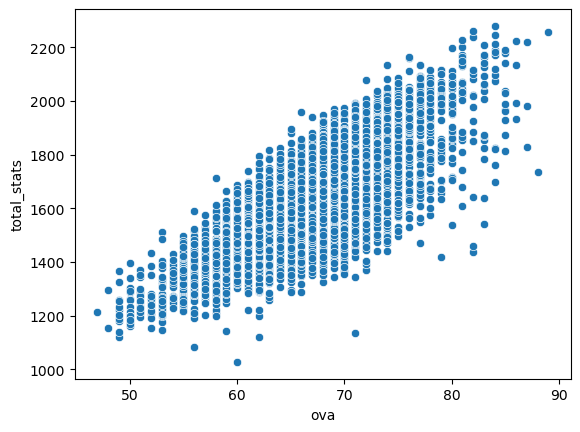

In [82]:
sns.scatterplot(x=only_def['ova'], y = only_def['total_stats'], data=train)
plt.show()

In [83]:
correlated_variables_only_def = only_def[['ova', 'heading_accuracy', 'short_passing', 'skill',
        'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration',
        'reactions', 'balance', 'power',
       'jumping', 'stamina', 'strength', 'long_shots', 'mentality',
       'aggression', 'interceptions', 'positioning', 
        'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle']]

In [84]:
correlated_variables_only_def_without_nan = correlated_variables_only_def.dropna()
correlated_variables_only_def_without_nan

,ova,heading_accuracy,short_passing,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,reactions,balance,power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,composure,defending,marking,standing_tackle,sliding_tackle
33,76,69,72,349,66.0,69,67,74,372,75,73,75.0,400,73.0,75,77,87,353,86,75.0,69.0,75.0,224,71,76,77.0
38,66,68,59,244,51.0,35,56,56,224,28,63,54.0,230,54.0,29,75,23,264,62,68.0,32.0,68.0,200,70,66,64.0
39,79,81,74,271,55.0,36,65,64,261,33,71,63.0,269,70.0,32,75,39,305,84,80.0,51.0,79.0,233,81,80,72.0
93,76,83,67,244,44.0,31,65,59,228,33,73,46.0,307,80.0,50,83,33,296,73,74.0,38.0,82.0,230,81,73,76.0
102,72,77,57,242,29.0,60,64,51,184,30,63,32.0,298,60.0,33,84,51,293,82,72.0,34.0,63.0,216,71,72,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13687,63,60,65,245,37.0,33,62,58,303,62,60,56.0,328,63.0,66,80,47,273,72,61.0,46.0,55.0,177,58,62,57.0
13688,63,60,59,227,30.0,31,57,54,313,75,51,50.0,285,74.0,70,54,29,257,72,54.0,44.0,55.0,181,59,60,62.0
13691,53,53,32,134,30.0,29,25,28,262,58,48,50.0,252,66.0,56,68,24,195,51,53.0,28.0,39.0,157,47,58,52.0
13692,64,49,60,283,60.0,43,56,61,371,82,57,75.0,290,65.0,71,44,53,287,72,58.0,61.0,54.0,178,56,60,62.0


In [85]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = correlated_variables_only_def_without_nan['ova']
X = correlated_variables_only_def_without_nan.drop(['ova'], axis=1)

lm_def = linear_model.LinearRegression()
model_def = lm_def.fit(X,Y)
lm_def.score(X,Y) # This is the R^2

predictions = lm_def.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm_def.intercept_)
print("The coefficients of the model are = ",lm_def.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.96
The intercept of the model is =  4.423231493608057
The coefficients of the model are =  [ 0.03422573  0.05814786  0.00049601  0.01538989  0.00238484 -0.00971226
  0.05914422  0.01893157  0.00739929  0.07160985 -0.03186102  0.00556515
 -0.01111091  0.03415891  0.02712962 -0.01158269 -0.00719058  0.04240004
  0.11918679  0.01861762  0.02567546  0.10791863  0.02494133  0.0620842
  0.0208931 ]
The mse of the model is =  1.624740504342718
The root mse of the model is =  1.2746530917636838
The mean absolute error of the model is =  1.00683400767267


# Use regression model to predict ova for test data - DEFENCE

In [86]:
test_list_def = ["CB","LB","LWB","RB","RWB"]



test_only_def = test[test['bp'].isin(list_def)]

test_only_def

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
2,16722,257995,A. Wahab Ibrahim,21,Ghana,Famalicão,LB,LB,https://cdn.sofifa.com/players/257/995/20_120.png,https://cdn.sofifa.com/teams/112809/light_60.png,https://cdn.sofifa.com/flags/gh.png,Famalicão 2020 ~ 2023,"5'11""",159lbs,Left,8,"Aug 10, 2020",NaN,€400K,€1K,€920K,2020 ~ 2023,246,60,32,54,59,41.0,247,58,37.0,41,52,59,326,69,76,62.0,56,63.0,256,40,56.0,61,69,30,251,53,57.0,51.0,49.0,41,52.0,176,55,60,61.0,42,7,14,9,5,7,1544,341,2 ★,2★,Medium,Medium,1 ★,73,35,54,59,57,63,4,51+2,51+2,51+2,55+0,53+0,53+0,53+0,55+0,54+2,54+2,54+2,57+2,54+2,54+2,54+2,57+2,60+2,57+2,57+2,57+2,60+2,60+2,59+2,59+2,59+2,60+2,14+2,Male
3,8037,226077,A. Gabr,29,Egypt,Egypt,CB,CB,https://cdn.sofifa.com/players/226/077/19_120.png,https://cdn.sofifa.com/teams/111130/light_60.png,https://cdn.sofifa.com/flags/eg.png,Egypt Free,"6'3""",194lbs,Right,0,"Jul 14, 2014",NaN,€0,€0,€0,Free,214,34,25,63,59,33.0,208,42,34.0,22,66,44,305,65,62,63.0,55,60.0,308,56,66.0,66,78,42,211,67,63.0,22.0,35.0,24,65.0,218,72,71,75.0,50,14,7,14,8,7,1514,332,2 ★,2★,Medium,Medium,1 ★,63,35,47,46,69,72,4,45+1,45+1,45+1,44+0,43+0,43+0,43+0,44+0,45+1,45+1,45+1,46+1,51+1,51+1,51+1,46+1,59+1,63+1,63+1,63+1,59+1,62+1,67+1,67+1,67+1,62+1,14+1,Male
6,16075,255741,K. Kamiya,23,Japan,Kawasaki Frontale,CB,CB CDM,https://cdn.sofifa.com/players/255/741/20_120.png,https://cdn.sofifa.com/teams/111730/light_60.png,https://cdn.sofifa.com/flags/jp.png,Kawasaki Frontale 2020 ~ 2022,"6'0""",168lbs,Right,7,"Feb 1, 2020",NaN,€110K,€2K,€165K,2020 ~ 2022,201,40,26,56,50,29.0,184,42,37.0,28,39,38,267,56,62,38.0,54,57.0,278,52,66.0,54,76,30,209,61,48.0,32.0,28.0,40,39.0,165,46,62,57.0,52,14,8,8,11,11,1356,294,2 ★,2★,Medium,Medium,1 ★,59,33,40,42,53,67,3,44+2,44+2,44+2,41+0,41+0,41+0,41+0,41+0,40+2,40+2,40+2,43+2,42+2,42+2,42+2,43+2,50+2,50+2,50+2,50+2,50+2,52+2,56+2,56+2,56+2,52+2,16+2,Male
10,4176,203430,G. Ray,26,Wales,Tranmere Rovers,CB,CB,https://cdn.sofifa.com/players/203/430/20_120.png,https://cdn.sofifa.com/teams/15048/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Tranmere Rovers 2019 ~ 2021,"6'4""",157lbs,Right,1,"Jul 1, 2019",NaN,€130K,€2K,€237K,2019 ~ 2021,148,15,19,61,35,18.0,153,47,16.0,12,33,45,293,61,54,58.0,50,70.0,256,20,82.0,65,74,15,166,55,54.0,12.0,17.0,28,48.0,178,58,61,59.0,52,13,10,12,9,8,1246,276,2 ★,2★,Low,High,1 ★,57,18,25,49,59,68,4,36+2,36+2,36+2,36+0,35+0,35+0,35+0,36+0,35+2,35+2,35+2,37+2,37+2,37+2,37+2,37+2,49+2,50+2,50+2,50+2,49+2,52+2,58+1,58+1,58+1,52+2,15+2,Male
15,11039,238095,N. Milenković,22,Serbia,Fiorentina,CB,CB RB,https://cdn.sofifa.com/players/238/095/20_120.png,https://cdn.sofifa.com/teams/110374/light_60.png,https://cdn.sofifa.com/flags/rs.png,Fiorentina 2017 ~ 2022,"6'5""",198lbs,Right,7,"Jul 10, 2017",NaN,€8.5M,€34K,€16.2M,2017 ~ 2022,283,72,38,70,68,35.0,248,60,34.0,22,64,68,281,65,58,44.0,74,40.0,343,60,68.0,76,85,54,264,78,75.0,22.0,55.0,34,70.0,227,76,77,74.0,49,8,7,13,7,14,1695,384,3 ★,2★,Medium,High,1 ★,61,44,62,61,75,81,119,55+2,55+2,55+2,57+0,56+0,56+0,56+0,57+0,57+2,57+2,57+2,61+2,63+2,63+2,63+2,61+2,72+2,72+2,72+2,72+2,72+2,72+2,75+2,75+2,75+2,72+2,16+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [87]:
test_correlated_variables_only_def = test_only_def[['heading_accuracy', 'short_passing', 'skill',
        'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration',
        'reactions', 'balance', 'power',
       'jumping', 'stamina', 'strength', 'long_shots', 'mentality',
       'aggression', 'interceptions', 'positioning', 
        'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle']]

In [88]:
test_correlated_variables_only_def 

,heading_accuracy,short_passing,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,reactions,balance,power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,composure,defending,marking,standing_tackle,sliding_tackle
2,54,59,247,37.0,41,52,59,326,69,56,63.0,256,56.0,61,69,30,251,53,57.0,51.0,52.0,176,55,60,61.0
3,63,59,208,34.0,22,66,44,305,65,55,60.0,308,66.0,66,78,42,211,67,63.0,22.0,65.0,218,72,71,75.0
6,56,50,184,37.0,28,39,38,267,56,54,57.0,278,66.0,54,76,30,209,61,48.0,32.0,39.0,165,46,62,57.0
10,61,35,153,16.0,12,33,45,293,61,50,70.0,256,82.0,65,74,15,166,55,54.0,12.0,48.0,178,58,61,59.0
15,70,68,248,34.0,22,64,68,281,65,74,40.0,343,68.0,76,85,54,264,78,75.0,22.0,70.0,227,76,77,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,83,73,321,70.0,46,63,74,340,68,74,66.0,337,80.0,63,64,60,353,76,77.0,69.0,66.0,222,75,74,73.0
3417,61,56,187,29.0,22,53,42,259,55,56,45.0,279,63.0,57,69,39,207,57,57.0,25.0,48.0,174,53,61,60.0
3420,60,49,238,34.0,44,26,68,344,71,65,86.0,286,65.0,69,56,41,242,51,68.0,42.0,68.0,216,72,74,70.0
3421,55,65,281,45.0,47,58,67,381,75,70,77.0,342,81.0,79,61,55,253,39,62.0,55.0,63.0,194,64,67,63.0


In [89]:
test_correlated_variables_only_def.isnull().sum()

heading_accuracy     0
short_passing        0
skill                0
curve                2
fk_accuracy          0
long_passing         0
ball_control         0
movement             0
acceleration         0
reactions            0
balance              2
power                0
jumping              2
stamina              0
strength             0
long_shots           0
mentality            0
aggression           0
interceptions        0
positioning          0
composure           27
defending            0
marking              0
standing_tackle      0
sliding_tackle       2
dtype: int64

In [90]:
test_correlated_variables_only_def_without_nan = test_correlated_variables_only_def.dropna()
test_correlated_variables_only_def_without_nan

,heading_accuracy,short_passing,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,reactions,balance,power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,composure,defending,marking,standing_tackle,sliding_tackle
2,54,59,247,37.0,41,52,59,326,69,56,63.0,256,56.0,61,69,30,251,53,57.0,51.0,52.0,176,55,60,61.0
3,63,59,208,34.0,22,66,44,305,65,55,60.0,308,66.0,66,78,42,211,67,63.0,22.0,65.0,218,72,71,75.0
6,56,50,184,37.0,28,39,38,267,56,54,57.0,278,66.0,54,76,30,209,61,48.0,32.0,39.0,165,46,62,57.0
10,61,35,153,16.0,12,33,45,293,61,50,70.0,256,82.0,65,74,15,166,55,54.0,12.0,48.0,178,58,61,59.0
15,70,68,248,34.0,22,64,68,281,65,74,40.0,343,68.0,76,85,54,264,78,75.0,22.0,70.0,227,76,77,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,83,73,321,70.0,46,63,74,340,68,74,66.0,337,80.0,63,64,60,353,76,77.0,69.0,66.0,222,75,74,73.0
3417,61,56,187,29.0,22,53,42,259,55,56,45.0,279,63.0,57,69,39,207,57,57.0,25.0,48.0,174,53,61,60.0
3420,60,49,238,34.0,44,26,68,344,71,65,86.0,286,65.0,69,56,41,242,51,68.0,42.0,68.0,216,72,74,70.0
3421,55,65,281,45.0,47,58,67,381,75,70,77.0,342,81.0,79,61,55,253,39,62.0,55.0,63.0,194,64,67,63.0


In [91]:
test_correlated_variables_only_def_without_nan.isnull().sum()

heading_accuracy    0
short_passing       0
skill               0
curve               0
fk_accuracy         0
long_passing        0
ball_control        0
movement            0
acceleration        0
reactions           0
balance             0
power               0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
interceptions       0
positioning         0
composure           0
defending           0
marking             0
standing_tackle     0
sliding_tackle      0
dtype: int64

In [92]:
test_correlated_variables_only_def_without_nan['ova'] = pd.Series(dtype='int')


In [93]:
test_correlated_variables_only_def_without_nan

,heading_accuracy,short_passing,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,reactions,balance,power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,composure,defending,marking,standing_tackle,sliding_tackle,ova
2,54,59,247,37.0,41,52,59,326,69,56,63.0,256,56.0,61,69,30,251,53,57.0,51.0,52.0,176,55,60,61.0,NaN
3,63,59,208,34.0,22,66,44,305,65,55,60.0,308,66.0,66,78,42,211,67,63.0,22.0,65.0,218,72,71,75.0,NaN
6,56,50,184,37.0,28,39,38,267,56,54,57.0,278,66.0,54,76,30,209,61,48.0,32.0,39.0,165,46,62,57.0,NaN
10,61,35,153,16.0,12,33,45,293,61,50,70.0,256,82.0,65,74,15,166,55,54.0,12.0,48.0,178,58,61,59.0,NaN
15,70,68,248,34.0,22,64,68,281,65,74,40.0,343,68.0,76,85,54,264,78,75.0,22.0,70.0,227,76,77,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,83,73,321,70.0,46,63,74,340,68,74,66.0,337,80.0,63,64,60,353,76,77.0,69.0,66.0,222,75,74,73.0,NaN
3417,61,56,187,29.0,22,53,42,259,55,56,45.0,279,63.0,57,69,39,207,57,57.0,25.0,48.0,174,53,61,60.0,NaN
3420,60,49,238,34.0,44,26,68,344,71,65,86.0,286,65.0,69,56,41,242,51,68.0,42.0,68.0,216,72,74,70.0,NaN
3421,55,65,281,45.0,47,58,67,381,75,70,77.0,342,81.0,79,61,55,253,39,62.0,55.0,63.0,194,64,67,63.0,NaN


In [94]:
Y = correlated_variables_only_def_without_nan['ova']
X = correlated_variables_only_def_without_nan.drop(['ova'], axis=1)

lm_def = linear_model.LinearRegression()
model = lm_def.fit(X,Y)

# Drop the 'ova' column from the test data to prepare it for predictions
test_data_without_ova_def = test_correlated_variables_only_def_without_nan.drop(['ova'], axis=1)

# Use the trained model to make predictions on the test data
predictions = lm_def.predict(test_data_without_ova_def)

# Add the predictions as a new column in the test data dataframe
test_data_without_ova_def['ova'] = predictions
test_data_without_ova_def

,heading_accuracy,short_passing,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,reactions,balance,power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,composure,defending,marking,standing_tackle,sliding_tackle,ova
2,54,59,247,37.0,41,52,59,326,69,56,63.0,256,56.0,61,69,30,251,53,57.0,51.0,52.0,176,55,60,61.0,61.457728
3,63,59,208,34.0,22,66,44,305,65,55,60.0,308,66.0,66,78,42,211,67,63.0,22.0,65.0,218,72,71,75.0,68.005088
6,56,50,184,37.0,28,39,38,267,56,54,57.0,278,66.0,54,76,30,209,61,48.0,32.0,39.0,165,46,62,57.0,56.131767
10,61,35,153,16.0,12,33,45,293,61,50,70.0,256,82.0,65,74,15,166,55,54.0,12.0,48.0,178,58,61,59.0,57.860428
15,70,68,248,34.0,22,64,68,281,65,74,40.0,343,68.0,76,85,54,264,78,75.0,22.0,70.0,227,76,77,74.0,75.401801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,83,73,321,70.0,46,63,74,340,68,74,66.0,337,80.0,63,64,60,353,76,77.0,69.0,66.0,222,75,74,73.0,75.724559
3417,61,56,187,29.0,22,53,42,259,55,56,45.0,279,63.0,57,69,39,207,57,57.0,25.0,48.0,174,53,61,60.0,58.995041
3420,60,49,238,34.0,44,26,68,344,71,65,86.0,286,65.0,69,56,41,242,51,68.0,42.0,68.0,216,72,74,70.0,69.282509
3421,55,65,281,45.0,47,58,67,381,75,70,77.0,342,81.0,79,61,55,253,39,62.0,55.0,63.0,194,64,67,63.0,67.349451


In [95]:
test_data_without_ova_def.sort_values('ova', ascending=False)

,heading_accuracy,short_passing,skill,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,reactions,balance,power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,composure,defending,marking,standing_tackle,sliding_tackle,ova
494,87,79,363,60.0,70,86,77,354,72,89,53.0,402,90.0,75,92,64,347,83,90.0,47.0,90.0,272,93,93,86.0,88.637462
1272,63,86,381,77.0,59,77,86,401,68,91,93.0,332,72.0,79,59,65,371,58,93.0,69.0,94.0,268,86,87,95.0,86.702831
1836,87,82,355,66.0,53,86,81,323,46,87,60.0,341,68.0,65,86,51,366,71,91.0,56.0,89.0,264,90,88,86.0,85.869033
1432,67,82,358,82.0,38,76,82,400,79,84,74.0,365,62.0,95,65,65,378,85,82.0,77.0,83.0,248,83,84,81.0,84.504339
603,82,79,305,59.0,39,63,79,377,77,85,68.0,350,85.0,75,77,51,336,86,83.0,62.0,76.0,251,81,84,86.0,84.075232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,42,36,142,28.0,25,28,29,257,52,47,58.0,231,61.0,52,68,18,183,42,49.0,20.0,39.0,153,46,55,52.0,50.585216
3262,45,33,125,26.0,22,23,26,285,57,42,73.0,229,71.0,56,47,24,188,48,47.0,29.0,38.0,158,45,56,57.0,50.247664
3067,39,44,254,56.0,57,46,47,357,81,47,73.0,273,65.0,61,56,34,197,44,41.0,42.0,38.0,131,39,46,46.0,50.197581
1766,44,33,139,26.0,26,23,39,259,62,41,52.0,244,66.0,61,65,15,194,50,49.0,27.0,38.0,141,39,52,50.0,49.907389


In [96]:
test.iloc[[494]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
494,4166,203376,V. van Dijk,28,Netherlands,Liverpool,CB,CB,https://cdn.sofifa.com/players/203/376/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/nl.png,Liverpool 2018 ~ 2023,"6'4""",203lbs,Right,1,"Jan 1, 2018",NaN,€75.5M,€210K,€145.3M,2018 ~ 2023,316,53,52,87,79,45.0,363,70,60.0,70,86,77,354,72,79,61.0,89,53.0,402,81,90.0,75,92,64,347,83,90.0,47.0,65.0,62,90.0,272,93,93,86.0,58,13,10,13,11,11,2112,455,3 ★,2★,Medium,Medium,3 ★,76,60,71,71,91,86,413,70+3,70+3,70+3,68+0,69+0,69+0,69+0,68+0,70+3,70+3,70+3,70+3,76+3,76+3,76+3,70+3,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3,20+3,Male


In [97]:
test.iloc[[1272]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
1272,366,121939,P. Lahm,32,Germany,FC Bayern München,RWB,RB CDM CM,https://cdn.sofifa.com/players/121/939/17_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/de.png,FC Bayern München 2002 ~ 2018,"5'7""",146lbs,Right,0,"Nov 1, 2002",NaN,€29.5M,€200K,€0,2002 ~ 2018,346,84,47,63,86,66.0,381,82,77.0,59,77,86,401,68,67,82.0,91,93.0,332,57,72.0,79,59,65,371,58,93.0,69.0,82.0,69,94.0,268,86,87,95.0,47,11,12,5,14,5,2146,439,3 ★,3★,Medium,High,4 ★,67,56,82,84,86,64,13,68+3,68+3,68+3,77+2,74+2,74+2,74+2,77+2,78+3,78+3,78+3,78+3,82+3,82+3,82+3,78+3,85+3,84+3,84+3,84+3,85+3,85+3,80+3,80+3,80+3,85+3,19+3,Male


In [98]:
test.iloc[[1836]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
1836,1566,178603,M. Hummels,31,Germany,Borussia Dortmund,CB,CB,https://cdn.sofifa.com/players/178/603/20_120.png,https://cdn.sofifa.com/teams/22/light_60.png,https://cdn.sofifa.com/flags/de.png,Borussia Dortmund 2019 ~ 2022,"6'3""",207lbs,Right,0,"Jul 1, 2019",NaN,€33M,€93K,€56.1M,2019 ~ 2022,349,65,55,87,82,60.0,355,69,66.0,53,86,81,323,46,67,63.0,87,60.0,341,71,68.0,65,86,51,366,71,91.0,56.0,80.0,68,89.0,264,90,88,86.0,42,15,6,10,5,6,2040,431,3 ★,3★,High,High,4 ★,58,58,77,72,89,77,140,69+3,69+3,69+3,68+0,70+0,70+0,70+0,68+0,72+3,72+3,72+3,71+3,78+3,78+3,78+3,71+3,78+3,84+2,84+2,84+2,78+3,80+3,85+1,85+1,85+1,80+3,17+3,Male


# MIDDLE

In [99]:
list_mid = ["CAM","CDM","CM","LM","RM","RW","LW"]



only_mid = train[train['bp'].isin(list_mid)]

only_mid

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,https://cdn.sofifa.com/flags/tr.png,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,https://cdn.sofifa.com/players/000/241/14_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,.

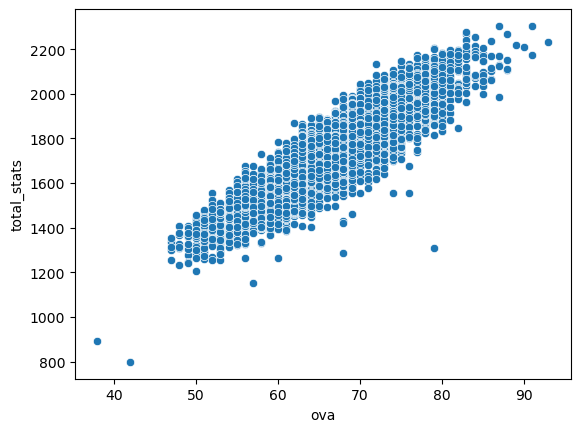

In [100]:
sns.scatterplot(x=only_mid['ova'], y = only_mid['total_stats'], data=train)
plt.show()

In [101]:
train_correlated_variables_only_mid = only_mid[['ova', 'attacking', 'crossing','short_passing', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'power', 'shot_power',
    'stamina', 'strength', 'long_shots', 'mentality',
      'interceptions', 'positioning', 'vision',
        'composure']]

In [102]:
train_correlated_variables_only_mid_without_nan = train_correlated_variables_only_mid.dropna()
train_correlated_variables_only_mid_without_nan

,ova,attacking,crossing,short_passing,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,stamina,strength,long_shots,mentality,interceptions,positioning,vision,composure
0,71,337,68,76,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,64,60,71,362,71.0,72.0,73.0,79.0
2,81,367,75,90,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,58,62,70,370,70.0,78.0,93.0,89.0
3,77,342,80,84,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,51,64,76,384,62.0,65.0,85.0,80.0
22,80,386,83,90,423,82,75.0,90,85,91,275,43,34,59.0,79,60.0,337,88,54,75,86,350,24.0,80.0,91.0,85.0
36,68,301,69,65,326,68,64.0,70,57,67,381,77,76,75.0,70,83.0,310,73,55,33,74,277,39.0,66.0,68.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,63,292,60,67,308,66,59.0,53,65,65,340,76,71,73.0,58,62.0,308,64,60,65,55,297,52.0,55.0,62.0,61.0
13693,52,226,44,53,265,54,53.0,47,55,56,309,67,62,60.0,52,68.0,265,57,53,56,41,228,38.0,47.0,53.0,52.0
13694,51,212,37,57,236,50,40.0,40,53,53,324,63,65,60.0,51,85.0,235,55,56,27,41,239,42.0,54.0,47.0,48.0
13695,58,238,47,62,269,63,44.0,42,55,65,355,77,73,68.0,52,85.0,242,47,51,45,37,219,25.0,47.0,57.0,55.0


In [103]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = train_correlated_variables_only_mid_without_nan['ova']
X = train_correlated_variables_only_mid_without_nan.drop(['ova'], axis=1)

lm_mid = linear_model.LinearRegression()
model_mid = lm_mid.fit(X,Y)
lm_mid.score(X,Y) # This is the R^2

predictions = lm_mid.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm_mid.intercept_)
print("The coefficients of the model are = ",lm_mid.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.94
The intercept of the model is =  3.1891797263147694
The coefficients of the model are =  [ 0.00583176  0.07021747  0.14958424  0.05010576  0.01128158 -0.0785325
 -0.06405193 -0.05458086  0.23598947  0.03594752  0.01597979 -0.02315524
 -0.03355187  0.12455186 -0.04787703 -0.00177045  0.02453434  0.04948217
  0.02181248  0.01786662  0.01356494 -0.01574068 -0.02642867  0.03225722
  0.04026386]
The mse of the model is =  2.9777875146365527
The root mse of the model is =  1.72562670199454
The mean absolute error of the model is =  1.3396425816041848


# Use regression model to predict ova for test data - MIDDLE

In [104]:
test_list_mid = ["CAM","CDM","CM","LM","RM","RW","LW"]



test_only_mid = test[test['bp'].isin(test_list_mid)]

test_only_mid

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
1,14193,248174,N. Boujellab,21,Morocco,FC Schalke 04,CAM,CAM CM CDM,https://cdn.sofifa.com/players/248/174/20_120.png,https://cdn.sofifa.com/teams/34/light_60.png,https://cdn.sofifa.com/flags/ma.png,FC Schalke 04 2018 ~ 2022,"6'0""",159lbs,Right,12,"Jul 1, 2018",NaN,€975K,€5K,€1.9M,2018 ~ 2022,274,50,58,49,65,52.0,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,52.0,59,47,51,272,58,38.0,56.0,61.0,59,58.0,160,55,54,51.0,54,15,15,7,10,7,1693,359,4 ★,3★,Medium,Medium,1 ★,69,56,59,73,50,52,33,60+2,60+2,60+2,64+0,64+0,64+0,64+0,64+0,65+2,65+2,65+2,64+2,61+2,61+2,61+2,64+2,57+2,56+2,56+2,56+2,57+2,56+2,53+2,53+2,53+2,56+2,17+2,Male
4,6350,216054,N. Domínguez,30,Argentina,Racing Club,CDM,CB CDM,https://cdn.sofifa.com/players/216/054/20_120.png,https://cdn.sofifa.com/teams/101085/light_60.png,https://cdn.sofifa.com/flags/ar.png,Racing Club 2019 ~ 2021,"6'0""",157lbs,Right,0,"Jan 21, 2019",NaN,€6M,€17K,€8.4M,2019 ~ 2021,313,62,61,68,79,43.0,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,71.0,79,76,69,340,69,79.0,56.0,81.0,55,75.0,238,79,78,81.0,67,15,13,12,11,16,1970,416,3 ★,3★,Medium,Medium,1 ★,55,64,74,70,78,75,17,67+2,67+2,67+2,67+0,69+0,69+0,69+0,67+0,71+2,71+2,71+2,69+2,76+0,76+0,76+0,69+2,74+2,78+-2,78+-2,78+-2,74+2,74+2,76+0,76+0,76+0,74+2,20+2,Male
5,10585,236601,S. Tracey,22,England,Shrewsbury,RM,RM ST LM,https://cdn.sofifa.com/players/236/601/20_120.png,https://cdn.sofifa.com/teams/127/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,"Shrewsbury Jun 30, 2021 On Loan","5'10""",168lbs,Right,10,"Jan 14, 2016","Jun 30, 2021",€325K,€2K,€0,"Jun 30, 2021 On Loan",248,62,56,43,55,32.0,266,65,58.0,39,45,59,322,76,74,64.0,46,62.0,286,58,62.0,52,60,54,237,48,41.0,52.0,54.0,42,48.0,125,47,38,40.0,54,9,10,8,14,13,1538,343,2 ★,2★,High,Medium,1 ★,75,54,54,62,42,56,15,56+2,56+2,56+2,60+0,58+0,58+0,58+0,60+0,57+2,57+2,57+2,59+2,52+2,52+2,52+2,59+2,52+2,48+2,48+2,48+2,52+2,51+2,47+2,47+2,47+2,51+2,15+2,Male
9,1358,176414,Denilson,25,Brazil,São Paulo,CDM,CDM CM,https://cdn.sofifa.com/players/176/414/14_120.png,https://cdn.sofifa.com/teams/598/light_60.png,https://cdn.sofifa.com/flags/br.png,São Paulo 2013 ~ 2017,"5'10""",161lbs,Right,5,"Jun 1, 2013",NaN,€1.8M,€30K,€0,2013 ~ 2017,326,67,53,60,78,68.0,327,72,66.0,41,74,74,344,69,61,73.0,70,71.0,371,71,79.0,74,73,74,322,70,75.0,49.0,68.0,60,NaN,205,68,69,68.0,57,15,14,9,14,5,1952,413,3 ★,3★,Medium,High,2 ★,65,62,71,73,69,73,4,63+0,63+0,63+0,68+0,66+0,66+0,66+0,68+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,70+0,71+0,72+0,72+0,72+0,71+0,70+0,70+0,70+0,70+0,70+0,15+0,Male
13,11177,238682,D. Hägele,31,Germany,FC Würzburger Kickers,CDM,CB CDM,https://cdn.sofifa.com/players/238/682/20_120.png,https://cdn.sofifa.com/teams/110197/light_60.png,https://cdn.sofifa.com/flags/de.png,FC Würzburger Kickers 2018 ~ 2022,"6'1""",168lbs,Right,0,"Jul 1, 2018",NaN,€475K,€5K,€736K,2018 ~ 2022,289,55,55,62,70,47.0,311,61,58.0,58,68,66,327,68,64,67.0,67,61.0,362,65,80.0,80,76,61,320,70,67.0,55.0,62.0,66,70.0,183,56,67,60.0,52,6,12,9,14,11,1844,390,4 ★,2★,Medium,Medium,1 ★,66,58,64,63,63,76,3,62+2,62+2,62+2,62+0,62+0,62+0,62+0,62+0,64+2,64+2,64+2,64+2,66+0,66+0,66+0,64+2,65+1,67+-1,67+-1,67+-1,65+1,65+1,66+0,66+0,66+0,65+1,17+2,Male
...,...

In [105]:
test_correlated_variables_only_mid = test_only_mid[[ 'attacking', 'crossing','short_passing', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'power', 'shot_power',
    'stamina', 'strength', 'long_shots', 'mentality',
      'interceptions', 'positioning', 'vision',
        'composure']]

In [106]:
test_correlated_variables_only_mid

,attacking,crossing,short_passing,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,stamina,strength,long_shots,mentality,interceptions,positioning,vision,composure
1,274,50,65,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,59,47,51,272,38.0,56.0,61.0,58.0
4,313,62,79,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,79,76,69,340,79.0,56.0,81.0,75.0
5,248,62,55,266,65,58.0,39,45,59,322,76,74,64.0,46,62.0,286,58,52,60,54,237,41.0,52.0,54.0,48.0
9,326,67,78,327,72,66.0,41,74,74,344,69,61,73.0,70,71.0,371,71,74,73,74,322,75.0,49.0,68.0,NaN
13,289,55,70,311,61,58.0,58,68,66,327,68,64,67.0,67,61.0,362,65,80,76,61,320,67.0,55.0,62.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,247,54,66,294,60,61.0,48,63,62,327,68,64,67.0,62,66.0,273,54,58,56,43,279,52.0,58.0,61.0,55.0
3415,288,64,63,315,68,62.0,60,59,66,352,74,72,73.0,62,71.0,290,58,56,62,57,270,26.0,65.0,62.0,60.0
3418,360,77,78,399,88,81.0,70,73,87,443,94,93,88.0,84,84.0,356,80,66,64,73,291,23.0,83.0,79.0,76.0
3419,301,70,65,348,74,73.0,69,60,72,360,73,78,82.0,58,69.0,334,70,67,67,68,269,37.0,63.0,67.0,61.0


In [107]:
test_correlated_variables_only_mid_without_nan = test_correlated_variables_only_mid.dropna()
test_correlated_variables_only_mid_without_nan

,attacking,crossing,short_passing,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,stamina,strength,long_shots,mentality,interceptions,positioning,vision,composure
1,274,50,65,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,59,47,51,272,38.0,56.0,61.0,58.0
4,313,62,79,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,79,76,69,340,79.0,56.0,81.0,75.0
5,248,62,55,266,65,58.0,39,45,59,322,76,74,64.0,46,62.0,286,58,52,60,54,237,41.0,52.0,54.0,48.0
13,289,55,70,311,61,58.0,58,68,66,327,68,64,67.0,67,61.0,362,65,80,76,61,320,67.0,55.0,62.0,70.0
14,254,48,63,314,74,58.0,49,63,70,354,78,67,78.0,55,76.0,265,65,48,43,44,235,29.0,45.0,60.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,247,54,66,294,60,61.0,48,63,62,327,68,64,67.0,62,66.0,273,54,58,56,43,279,52.0,58.0,61.0,55.0
3415,288,64,63,315,68,62.0,60,59,66,352,74,72,73.0,62,71.0,290,58,56,62,57,270,26.0,65.0,62.0,60.0
3418,360,77,78,399,88,81.0,70,73,87,443,94,93,88.0,84,84.0,356,80,66,64,73,291,23.0,83.0,79.0,76.0
3419,301,70,65,348,74,73.0,69,60,72,360,73,78,82.0,58,69.0,334,70,67,67,68,269,37.0,63.0,67.0,61.0


In [108]:
test_correlated_variables_only_mid_without_nan['ova'] = pd.Series(dtype='int')

In [109]:
test_correlated_variables_only_mid_without_nan

,attacking,crossing,short_passing,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,stamina,strength,long_shots,mentality,interceptions,positioning,vision,composure,ova
1,274,50,65,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,59,47,51,272,38.0,56.0,61.0,58.0,NaN
4,313,62,79,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,79,76,69,340,79.0,56.0,81.0,75.0,NaN
5,248,62,55,266,65,58.0,39,45,59,322,76,74,64.0,46,62.0,286,58,52,60,54,237,41.0,52.0,54.0,48.0,NaN
13,289,55,70,311,61,58.0,58,68,66,327,68,64,67.0,67,61.0,362,65,80,76,61,320,67.0,55.0,62.0,70.0,NaN
14,254,48,63,314,74,58.0,49,63,70,354,78,67,78.0,55,76.0,265,65,48,43,44,235,29.0,45.0,60.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,247,54,66,294,60,61.0,48,63,62,327,68,64,67.0,62,66.0,273,54,58,56,43,279,52.0,58.0,61.0,55.0,NaN
3415,288,64,63,315,68,62.0,60,59,66,352,74,72,73.0,62,71.0,290,58,56,62,57,270,26.0,65.0,62.0,60.0,NaN
3418,360,77,78,399,88,81.0,70,73,87,443,94,93,88.0,84,84.0,356,80,66,64,73,291,23.0,83.0,79.0,76.0,NaN
3419,301,70,65,348,74,73.0,69,60,72,360,73,78,82.0,58,69.0,334,70,67,67,68,269,37.0,63.0,67.0,61.0,NaN


In [110]:
Y = train_correlated_variables_only_mid_without_nan['ova']
X = train_correlated_variables_only_mid_without_nan.drop(['ova'], axis=1)

lm_mid = linear_model.LinearRegression()
model = lm_mid.fit(X,Y)

# Drop the 'ova' column from the test data to prepare it for predictions
test_data_without_ova_mid = test_correlated_variables_only_mid_without_nan.drop(['ova'], axis=1)

# Use the trained model to make predictions on the test data
predictions = lm_mid.predict(test_data_without_ova_mid)

# Add the predictions as a new column in the test data dataframe
test_data_without_ova_mid['ova'] = predictions
test_data_without_ova_mid

,attacking,crossing,short_passing,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,stamina,strength,long_shots,mentality,interceptions,positioning,vision,composure,ova
1,274,50,65,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,59,47,51,272,38.0,56.0,61.0,58.0,65.603583
4,313,62,79,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,79,76,69,340,79.0,56.0,81.0,75.0,75.387715
5,248,62,55,266,65,58.0,39,45,59,322,76,74,64.0,46,62.0,286,58,52,60,54,237,41.0,52.0,54.0,48.0,58.014656
13,289,55,70,311,61,58.0,58,68,66,327,68,64,67.0,67,61.0,362,65,80,76,61,320,67.0,55.0,62.0,70.0,67.919437
14,254,48,63,314,74,58.0,49,63,70,354,78,67,78.0,55,76.0,265,65,48,43,44,235,29.0,45.0,60.0,61.0,63.593371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,247,54,66,294,60,61.0,48,63,62,327,68,64,67.0,62,66.0,273,54,58,56,43,279,52.0,58.0,61.0,55.0,62.020275
3415,288,64,63,315,68,62.0,60,59,66,352,74,72,73.0,62,71.0,290,58,56,62,57,270,26.0,65.0,62.0,60.0,65.024859
3418,360,77,78,399,88,81.0,70,73,87,443,94,93,88.0,84,84.0,356,80,66,64,73,291,23.0,83.0,79.0,76.0,82.110066
3419,301,70,65,348,74,73.0,69,60,72,360,73,78,82.0,58,69.0,334,70,67,67,68,269,37.0,63.0,67.0,61.0,68.025711


In [111]:
test_data_without_ova_mid.sort_values('ova', ascending=False)

,attacking,crossing,short_passing,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,stamina,strength,long_shots,mentality,interceptions,positioning,vision,composure,ova
1912,410,76,85,391,91,76.0,64,71,89,460,95,93,93.0,93,86.0,406,84,88,70,78,358,35.0,92.0,85.0,84.0,88.170371
1385,405,82,87,436,91,88.0,88,75,94,437,89,82,92.0,84,90.0,382,82,78,60,87,348,42.0,85.0,87.0,84.0,87.096501
726,380,86,91,427,85,85.0,78,89,90,417,76,70,91.0,88,92.0,371,79,84,58,82,391,79.0,78.0,90.0,92.0,86.981057
2731,363,75,90,409,87,84.0,64,86,88,410,80,80,83.0,88,79.0,369,68,90,74,61,356,82.0,73.0,86.0,90.0,85.624123
1156,385,86,90,428,77,89.0,85,87,90,385,74,70,77.0,84,80.0,370,84,92,56,89,341,56.0,82.0,90.0,86.0,85.469148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,232,49,51,234,55,44.0,42,43,50,299,65,73,56.0,39,66.0,225,54,45,41,36,202,24.0,45.0,51.0,51.0,50.741455
630,198,48,40,216,52,36.0,39,36,53,316,68,70,70.0,41,67.0,235,53,54,45,38,177,16.0,35.0,46.0,43.0,50.356022
835,193,39,54,212,41,34.0,38,50,49,280,59,52,60.0,46,63.0,248,44,54,57,31,213,44.0,30.0,41.0,40.0,49.896767
1118,218,46,52,218,46,42.0,38,46,46,310,73,76,62.0,39,60.0,243,40,57,54,40,213,28.0,48.0,50.0,46.0,49.887690


In [112]:
test.iloc[[1912]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
1912,5030,208722,S. Mané,28,Senegal,Liverpool,LW,LW,https://cdn.sofifa.com/players/208/722/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/sn.png,Liverpool 2016 ~ 2023,"5'9""",152lbs,Right,0,"Jul 1, 2016",NaN,€78M,€250K,€144.3M,2016 ~ 2023,410,76,90,84,85,75.0,391,91,76.0,64,71,89,460,95,93,93.0,93,86.0,406,84,86.0,88,70,78,358,75,35.0,92.0,85.0,71,84.0,122,42,42,38.0,56,10,10,15,7,14,2203,469,4 ★,4★,High,Medium,3 ★,94,85,80,90,44,76,374,88+2,88+2,88+2,89+0,89+0,89+0,89+0,89+0,88+2,88+2,88+2,88+2,81+3,81+3,81+3,88+2,69+3,65+3,65+3,65+3,69+3,66+3,59+3,59+3,59+3,66+3,20+3,Male


In [113]:
test.iloc[[1385]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
1385,5425,211110,P. Dybala,26,Argentina,Juventus,CAM,CF CAM,https://cdn.sofifa.com/players/211/110/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/ar.png,Juventus 2015 ~ 2022,"5'10""",165lbs,Left,1,"Jul 1, 2015",NaN,€71M,€190K,€122.5M,2015 ~ 2022,405,82,84,64,87,88.0,436,91,88.0,88,75,94,437,89,82,92.0,84,90.0,382,82,75.0,78,60,87,348,48,42.0,85.0,87.0,86,84.0,120,32,48,40.0,26,5,4,4,5,8,2154,452,3 ★,4★,Medium,Medium,3 ★,85,85,84,92,43,63,433,83+3,83+3,83+3,87+0,87+0,87+0,87+0,87+0,88+1,88+1,88+1,86+3,82+3,82+3,82+3,86+3,68+3,64+3,64+3,64+3,68+3,64+3,54+3,54+3,54+3,64+3,14+3,Male


In [114]:
test.iloc[[726]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
726,1411,177003,L. Modrić,34,Croatia,Real Madrid,CM,CM,https://cdn.sofifa.com/players/177/003/20_120.png,https://cdn.sofifa.com/teams/243/light_60.png,https://cdn.sofifa.com/flags/hr.png,Real Madrid 2012 ~ 2021,"5'8""",146lbs,Right,0,"Aug 1, 2012",NaN,€24.5M,€260K,€50.2M,2012 ~ 2021,380,86,72,55,91,76.0,427,85,85.0,78,89,90,417,76,70,91.0,88,92.0,371,79,68.0,84,58,82,391,62,79.0,78.0,90.0,82,92.0,214,68,75,71.0,52,13,9,7,14,9,2252,463,4 ★,4★,High,Medium,4 ★,73,76,89,88,71,66,212,76+3,76+3,76+3,83+0,82+0,82+0,82+0,83+0,85+2,85+2,85+2,84+3,86+1,86+1,86+1,84+3,81+3,81+3,81+3,81+3,81+3,78+3,71+3,71+3,71+3,78+3,19+3,Male


# ATTACK

In [115]:
list_ata = ["ST","CF"]



only_ata = train[train['bp'].isin(list_ata)]

only_ata

,unnamed:_0,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
8,12,330,R. Keane,35,80,Republic of Ireland,LA Galaxy,81,CF,ST,https://cdn.sofifa.com/players/000/330/17_120.png,https://cdn.sofifa.com/teams/697/light_60.png,https://cdn.sofifa.com/flags/ie.png,80,LA Galaxy 2011 ~ 2022,"5'9""",161lbs,Right,0,"Aug 1, 2011",NaN,€5.5M,€10K,€0,2011 ~ 2022,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,80,343,67,34.0,85.0,82.0,75,86.0,71,28,26,17.0,63,11,9,13,14,16,1974,407,4 ★,3★,High,Low,2 ★,68,82,75,82,31,69,10,79+1,79+1,79+1,79+0,81+-1,81+-1,81+-1,79+0,81+-1,81+-1,81+-1,78+1,74+1,74+1,74+1,78+1,57+1,57+1,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1,Male
11,16,570,A. Okocha,33,73,Nigeria,Hull City,76,CF,NaN,https://cdn.sofifa.com/players/000/570/08_120.png,https://cdn.sofifa.com/teams/1952/light_60.png,https://cdn.sofifa.com/flags/ng.png,90,Hull City 2009,"5'8""",154lbs,Right,17,NaN,NaN,€0,€0,€0,2009,247,72,60,40,75,NaN,334,90,NaN,83,70,91,192,68,64,NaN,60,NaN,252,74,NaN,41,57,80,249,36,69.0,60.0,NaN,84,NaN,57,23,34,NaN,74,11,21,70,21,21,1405,381,3 ★,1★,NaN,NaN,2 ★,66,69,74,86,38,48,3,71+0,71+0,71+0,76+0,71+0,71+0,71+0,76+0,73+0,73+0,73+0,76+0,71+0,71+0,71+0,76+0,55+0,63+0,63+0,63+0,55+0,51+0,42+0,42+0,42+0,51+0,23+0,Male
12,17,670,Zulu,26,66,Brazil,Pohang Steelers,66,ST,NaN,https://cdn.sofifa.com/players/000/670/11_120.png,https://cdn.sofifa.com/teams/1474/light_60.png,https://cdn.sofifa.com/flags/br.png,72,Pohang Steelers 2005 ~ 2013,"6'4""",198lbs,Right,6,"Jan 1, 2005",NaN,€0,€0,€0,2005 ~ 2013,305,43,66,73,62,61.0,269,61,55.0,47,47,59,361,72,76,68.0,67,78.0,351,56,79.0,71,80,65,261,70,32.0,45.0,62.0,52,NaN,101,38,31,32.0,56,10,15,6,14,11,1704,367,3 ★,2★,NaN,NaN,1 ★,74,62,55,62,38,76,3,66+0,66+0,66+0,62+0,64+0,64+0,64+0,62+0,61+0,61+0,61+0,60+0,59+0,59+0,59+0,60+0,51+0,54+0,54+0,54+0,51+0,51+0,54+0,54+0,54+0,51+0,16+0,Male
21,29,1198,F. Inzaghi,37,73,Italy,Milan,72,ST,ST,https://cdn.sofifa.com/players/001/198/12_120.png,https://cdn.sofifa.com/teams/47/light_60.png,https://cdn.sofifa.com/flags/it.png,73,Milan 2001 ~ 2012,"5'11""",163lbs,Right,0,"Jan 1, 2001",NaN,€350K,€15K,€0,2001 ~ 2012,340,35,87,77,61,80.0,237,50,56.0,32,34,65,312,67,39,53.0,88,65.0,235,55,74.0,31,30,45,288,43,15.0,94.0,57.0,79,NaN,43,11,13,19.0,52,14,10,11,10,7,1507,285,3 ★,2★,Medium,Low,3 ★,52,72,49,57,20,35,4,72+1,72+1,72+1,59+1,68+1,68+1,68+1,59+1,66+1,66+1,66+1,55+1,52+1,52+1,52+1,55+1,38+1,40+1,40+1,40+1,38+1,37+1,35+1,35+1,35+1,37+1,15+1,Male
28,39,1845,O. Solskjær,34,75,Norway,Manchester United,75,ST,ST,https://cdn.sofifa.com/players/001/845/08_120.png,https://cdn.sofifa.com/teams/11/light_60.png,https://cdn.sofifa.com/flags/no.png,83,Manchester United 2008,"5'9""",163lbs,Right,8,NaN,NaN,€0,€0,€0,2008,294,60,86,78,70,NaN,264,74,NaN,59,54,77,205,65,64,NaN,76,NaN,254,72,NaN,58,59,65,287,51,71.0,81.0,NaN,84,NaN,55,31,24,NaN,73,10,21,54,21,21,1432,377,4 ★,1★,NaN,NaN,2 ★,64,78,62,75,41,57,7,75+0,75+0,75+0,68+0,75+0,75+0,75+0,68+0,71+0,71+0,71+0,68+0,64+0,64+0,64+0,68+0,52+0,62+0,62+0,62+0,52+0,53+0,49+0,49+0,49+0,53+0,23+0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

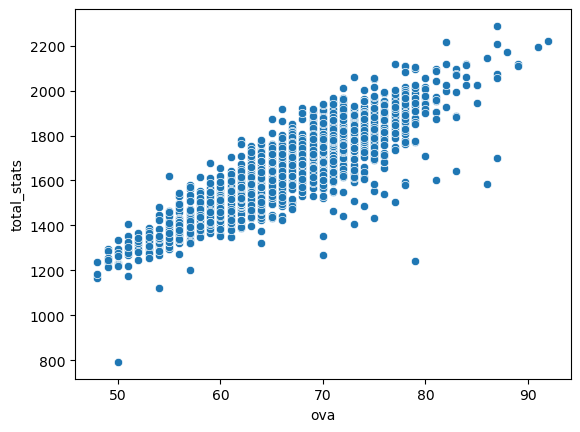

In [116]:
sns.scatterplot(x=only_ata['ova'], y = only_ata['total_stats'], data=train)
plt.show()

In [117]:
train_correlated_variables_only_ata = only_ata[['ova', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'power', 'shot_power',
       'jumping', 'stamina', 'strength', 'mentality',
       'positioning', 'vision',
       'penalties', 'composure']]

In [118]:
train_correlated_variables_only_ata

,ova,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,composure
8,80,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,343,85.0,82.0,75,86.0
11,73,247,72,60,40,75,NaN,334,90,NaN,83,70,91,192,68,64,NaN,60,NaN,252,74,NaN,41,57,249,60.0,NaN,84,NaN
12,66,305,43,66,73,62,61.0,269,61,55.0,47,47,59,361,72,76,68.0,67,78.0,351,56,79.0,71,80,261,45.0,62.0,52,NaN
21,73,340,35,87,77,61,80.0,237,50,56.0,32,34,65,312,67,39,53.0,88,65.0,235,55,74.0,31,30,288,94.0,57.0,79,NaN
28,75,294,60,86,78,70,NaN,264,74,NaN,59,54,77,205,65,64,NaN,76,NaN,254,72,NaN,58,59,287,81.0,NaN,84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,51,228,28,57,42,51,50.0,217,56,50.0,31,33,47,303,61,58,56.0,50,78.0,257,56,53.0,57,43,205,45.0,49.0,65,47.0
13674,55,247,26,60,56,50,55.0,209,51,36.0,30,39,53,291,60,57,55.0,49,70.0,303,57,62.0,63,68,200,49.0,44.0,49,41.0
13683,61,295,59,60,58,59,59.0,269,62,54.0,45,46,62,358,75,78,77.0,56,72.0,289,65,61.0,56,46,224,63.0,58.0,61,54.0
13690,62,268,31,67,65,53,52.0,236,58,44.0,38,40,56,361,78,75,72.0,59,77.0,307,66,66.0,58,53,254,60.0,58.0,72,56.0


In [119]:
train_correlated_variables_only_ata_without_nan = train_correlated_variables_only_ata.dropna()
train_correlated_variables_only_ata_without_nan

,ova,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,composure
8,80,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,83,83.0,363,81,62.0,72,68,343,85.0,82.0,75,86.0
37,71,337,58,77,64,63,75.0,318,70,74.0,61,44,69,325,64,67,68.0,70,56.0,349,69,65.0,65,80,296,75.0,59.0,72,71.0
60,72,347,51,76,77,68,75.0,298,64,68.0,53,41,72,317,62,55,69.0,71,60.0,336,71,80.0,54,74,280,77.0,62.0,71,73.0
80,63,288,41,66,66,58,57.0,262,54,46.0,47,52,63,286,47,49,61.0,63,66.0,350,64,76.0,67,83,270,64.0,55.0,69,61.0
103,58,261,47,54,57,52,51.0,227,56,42.0,27,46,56,272,57,62,46.0,59,48.0,328,56,64.0,75,83,267,57.0,55.0,55,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,51,228,28,57,42,51,50.0,217,56,50.0,31,33,47,303,61,58,56.0,50,78.0,257,56,53.0,57,43,205,45.0,49.0,65,47.0
13674,55,247,26,60,56,50,55.0,209,51,36.0,30,39,53,291,60,57,55.0,49,70.0,303,57,62.0,63,68,200,49.0,44.0,49,41.0
13683,61,295,59,60,58,59,59.0,269,62,54.0,45,46,62,358,75,78,77.0,56,72.0,289,65,61.0,56,46,224,63.0,58.0,61,54.0
13690,62,268,31,67,65,53,52.0,236,58,44.0,38,40,56,361,78,75,72.0,59,77.0,307,66,66.0,58,53,254,60.0,58.0,72,56.0


In [120]:
# Another way of doing these!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = train_correlated_variables_only_ata_without_nan['ova']
X = train_correlated_variables_only_ata_without_nan.drop(['ova'], axis=1)

lm_ata = linear_model.LinearRegression()
model_ata = lm_ata.fit(X,Y)
lm_ata.score(X,Y) # This is the R^2

predictions = lm_ata.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm_ata.intercept_)
print("The coefficients of the model are = ",lm_ata.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.99
The intercept of the model is =  0.3144057222825012
The coefficients of the model are =  [ 0.05836634 -0.05965073  0.13187311  0.02713138 -0.00451696 -0.03647047
  0.02985988  0.04198936 -0.02839785 -0.0294927  -0.03086801  0.07662908
  0.02887204  0.00822929  0.01893615 -0.02721749  0.05985956 -0.03093547
  0.02528615  0.07080235 -0.0237816  -0.02604969  0.01996824  0.00052124
  0.12016384 -0.00313961  0.00326832  0.00622724]
The mse of the model is =  0.3698031511430032
The root mse of the model is =  0.6081144227388487
The mean absolute error of the model is =  0.4362952456631845


# Use regression model to predict ova for test data - Attack

In [121]:
test_list_ata = ["ST","CF"]



test_only_ata = test[test['bp'].isin(list_ata)]

test_only_ata

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,15195,252942,G. Borrelli,19,Italy,Pescara,ST,ST,https://cdn.sofifa.com/players/252/942/20_120.png,https://cdn.sofifa.com/teams/200/light_60.png,https://cdn.sofifa.com/flags/it.png,Pescara 2019 ~ 2024,"6'4""",198lbs,Right,15,"Jul 12, 2019",NaN,€325K,€600,€707K,2019 ~ 2024,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,48,227,44,21.0,66.0,41.0,55,45.0,53,18,20,15.0,54,12,14,7,7,14,1307,284,2 ★,2★,Medium,Low,1 ★,52,57,36,52,24,63,4,58+2,58+2,58+2,50+0,54+0,54+0,54+0,50+0,50+2,50+2,50+2,48+2,44+2,44+2,44+2,48+2,34+2,35+2,35+2,35+2,34+2,34+2,38+2,38+2,38+2,34+2,16+2,Male
7,6421,216391,Erik,25,Brazil,Yokohama F. Marinos,CF,CF LM RM,https://cdn.sofifa.com/players/216/391/20_120.png,https://cdn.sofifa.com/teams/101151/light_60.png,https://cdn.sofifa.com/flags/br.png,Yokohama F. Marinos 2020 ~ 2020,"5'7""",143lbs,Right,2,"Aug 1, 2020",NaN,€5M,€12K,€6.9M,2020 ~ 2020,330,62,72,61,71,64.0,311,76,56.0,43,62,74,393,84,80,82.0,69,78.0,340,73,77.0,68,55,67,247,25,17.0,73.0,65.0,67,62.0,59,22,16,21.0,56,14,9,13,9,11,1736,370,4 ★,3★,Medium,Medium,1 ★,82,71,65,76,23,53,25,71+2,71+2,71+2,73+0,73+0,73+0,73+0,73+0,72+2,72+2,72+2,72+2,64+2,64+2,64+2,72+2,51+2,46+2,46+2,46+2,51+2,47+2,37+2,37+2,37+2,47+2,17+2,Male
8,3902,201911,W. Keane,26,England,Ipswich Town,ST,ST,https://cdn.sofifa.com/players/201/911/20_120.png,https://cdn.sofifa.com/teams/94/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Ipswich Town 2019 ~ 2020,"6'2""",159lbs,Right,1,"Aug 20, 2019",NaN,€775K,€5K,€1.4M,2019 ~ 2020,298,42,63,63,68,62.0,280,65,48.0,47,51,69,315,60,66,72.0,55,62.0,330,72,65.0,64,67,62,281,55,39.0,64.0,56.0,67,66.0,99,42,32,25.0,53,10,11,15,11,6,1656,353,3 ★,3★,Medium,Medium,1 ★,63,65,56,66,39,64,6,65+2,65+2,65+2,62+0,64+0,64+0,64+0,62+0,63+2,63+2,63+2,61+2,59+2,59+2,59+2,61+2,50+2,51+2,51+2,51+2,50+2,48+2,48+2,48+2,48+2,48+2,15+2,Male
11,13764,246784,K. Cannavò,20,Italy,Empoli,ST,ST LW,https://cdn.sofifa.com/players/246/784/20_120.png,https://cdn.sofifa.com/teams/1746/light_60.png,https://cdn.sofifa.com/flags/it.png,Empoli 2019 ~ 2021,"5'11""",154lbs,Right,17,"Jul 18, 2019",NaN,€275K,€500,€777K,2019 ~ 2021,265,49,59,54,48,55.0,257,52,58.0,50,43,54,351,78,78,71.0,54,70.0,288,59,68.0,43,65,53,243,50,22.0,59.0,51.0,61,50.0,70,30,20,20.0,52,10,14,10,6,12,1526,325,3 ★,2★,High,Low,1 ★,78,58,49,56,27,57,8,58+2,58+2,58+2,57+0,57+0,57+0,57+0,57+0,55+2,55+2,55+2,55+2,47+2,47+2,47+2,55+2,42+2,39+2,39+2,39+2,42+2,41+2,39+2,39+2,39+2,41+2,15+2,Male
19,14714,251700,S. Mandíquez,31,Ecuador,Ecuador,ST,ST,https://cdn.sofifa.com/players/251/700/20_120.png,https://cdn.sofifa.com/teams/111465/light_60.png,https://cdn.sofifa.com/flags/ec.png,Ecuador Free,"6'2""",185lbs,Right,0,"Jan 1, 2010",NaN,€0,€0,€0,Free,361,48,83,86,69,75.0,296,75,53.0,52,40,76,352,78,81,72.0,73,48.0,382,86,67.0,68,91,70,302,72,33.0,82.0,53.0,62,75.0,54,18,23,13.0,52,13,13,7,5,14,1799,399,4 ★,4★,High,Medium,2 ★,80,80,56,74,29,80,41,80+0,80+0,80+0,72+0,75+0,75+0,75+0,72+0,71+2,71+2,71+2,70+2,62+2,62+2,62+2,70+2,51+2,49+2,49+2,49+2,51+2,49+2,49+2,49+2,49+2,49+2,18+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [122]:
test_correlated_variables_only_ata = test_only_ata[[ 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'power', 'shot_power',
       'jumping', 'stamina', 'strength', 'mentality',
       'positioning', 'vision',
       'penalties', 'composure']]

In [123]:
test_correlated_variables_only_ata_without_nan = test_correlated_variables_only_ata.dropna()
test_correlated_variables_only_ata_without_nan

,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,composure
0,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,227,66.0,41.0,55,45.0
7,330,62,72,61,71,64.0,311,76,56.0,43,62,74,393,84,80,82.0,69,78.0,340,73,77.0,68,55,247,73.0,65.0,67,62.0
8,298,42,63,63,68,62.0,280,65,48.0,47,51,69,315,60,66,72.0,55,62.0,330,72,65.0,64,67,281,64.0,56.0,67,66.0
11,265,49,59,54,48,55.0,257,52,58.0,50,43,54,351,78,78,71.0,54,70.0,288,59,68.0,43,65,243,59.0,51.0,61,50.0
19,361,48,83,86,69,75.0,296,75,53.0,52,40,76,352,78,81,72.0,73,48.0,382,86,67.0,68,91,302,82.0,53.0,62,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,261,42,60,61,55,43.0,250,59,58.0,28,47,58,288,63,62,59.0,50,54.0,306,63,60.0,58,72,244,59.0,48.0,59,50.0
3402,292,58,66,57,57,54.0,250,65,35.0,31,55,64,354,78,76,76.0,54,70.0,314,63,65.0,67,60,251,60.0,48.0,58,48.0
3404,283,40,63,70,60,50.0,255,62,47.0,36,39,71,285,55,52,63.0,54,61.0,317,61,68.0,66,65,218,52.0,49.0,62,65.0
3407,296,48,67,68,63,50.0,272,64,60.0,40,48,60,337,70,73,66.0,65,63.0,331,65,74.0,67,63,238,61.0,56.0,66,59.0


In [124]:
test_correlated_variables_only_ata_without_nan['ova'] = pd.Series(dtype='int')

In [125]:
test_correlated_variables_only_ata_without_nan

,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,composure,ova
0,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,227,66.0,41.0,55,45.0,NaN
7,330,62,72,61,71,64.0,311,76,56.0,43,62,74,393,84,80,82.0,69,78.0,340,73,77.0,68,55,247,73.0,65.0,67,62.0,NaN
8,298,42,63,63,68,62.0,280,65,48.0,47,51,69,315,60,66,72.0,55,62.0,330,72,65.0,64,67,281,64.0,56.0,67,66.0,NaN
11,265,49,59,54,48,55.0,257,52,58.0,50,43,54,351,78,78,71.0,54,70.0,288,59,68.0,43,65,243,59.0,51.0,61,50.0,NaN
19,361,48,83,86,69,75.0,296,75,53.0,52,40,76,352,78,81,72.0,73,48.0,382,86,67.0,68,91,302,82.0,53.0,62,75.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,261,42,60,61,55,43.0,250,59,58.0,28,47,58,288,63,62,59.0,50,54.0,306,63,60.0,58,72,244,59.0,48.0,59,50.0,NaN
3402,292,58,66,57,57,54.0,250,65,35.0,31,55,64,354,78,76,76.0,54,70.0,314,63,65.0,67,60,251,60.0,48.0,58,48.0,NaN
3404,283,40,63,70,60,50.0,255,62,47.0,36,39,71,285,55,52,63.0,54,61.0,317,61,68.0,66,65,218,52.0,49.0,62,65.0,NaN
3407,296,48,67,68,63,50.0,272,64,60.0,40,48,60,337,70,73,66.0,65,63.0,331,65,74.0,67,63,238,61.0,56.0,66,59.0,NaN


In [126]:
Y = train_correlated_variables_only_ata_without_nan['ova']
X = train_correlated_variables_only_ata_without_nan.drop(['ova'], axis=1)

lm_ata = linear_model.LinearRegression()
model = lm_ata.fit(X,Y)

# Drop the 'ova' column from the test data to prepare it for predictions
test_data_without_ova_ata = test_correlated_variables_only_ata_without_nan.drop(['ova'], axis=1)

# Use the trained model to make predictions on the test data
predictions = lm_ata.predict(test_data_without_ova_ata)

# Add the predictions as a new column in the test data dataframe
test_data_without_ova_ata['ova'] = predictions
test_data_without_ova_ata

,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,composure,ova
0,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,227,66.0,41.0,55,45.0,58.056371
7,330,62,72,61,71,64.0,311,76,56.0,43,62,74,393,84,80,82.0,69,78.0,340,73,77.0,68,55,247,73.0,65.0,67,62.0,71.349526
8,298,42,63,63,68,62.0,280,65,48.0,47,51,69,315,60,66,72.0,55,62.0,330,72,65.0,64,67,281,64.0,56.0,67,66.0,64.816216
11,265,49,59,54,48,55.0,257,52,58.0,50,43,54,351,78,78,71.0,54,70.0,288,59,68.0,43,65,243,59.0,51.0,61,50.0,58.402710
19,361,48,83,86,69,75.0,296,75,53.0,52,40,76,352,78,81,72.0,73,48.0,382,86,67.0,68,91,302,82.0,53.0,62,75.0,80.270003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,261,42,60,61,55,43.0,250,59,58.0,28,47,58,288,63,62,59.0,50,54.0,306,63,60.0,58,72,244,59.0,48.0,59,50.0,59.249241
3402,292,58,66,57,57,54.0,250,65,35.0,31,55,64,354,78,76,76.0,54,70.0,314,63,65.0,67,60,251,60.0,48.0,58,48.0,62.699407
3404,283,40,63,70,60,50.0,255,62,47.0,36,39,71,285,55,52,63.0,54,61.0,317,61,68.0,66,65,218,52.0,49.0,62,65.0,61.025048
3407,296,48,67,68,63,50.0,272,64,60.0,40,48,60,337,70,73,66.0,65,63.0,331,65,74.0,67,63,238,61.0,56.0,66,59.0,64.761553


In [127]:
test_data_without_ova_ata.sort_values('ova', ascending=False)

,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,composure,ova
158,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,341,91.0,80.0,70,84.0,87.978133
2347,429,80,92,84,83,90.0,413,84,86.0,82,77,84,386,72,68,76.0,92,78.0,409,89,69.0,78,85,386,91.0,84.0,83,85.0,86.785511
2680,390,68,92,79,69,82.0,330,77,67.0,57,48,81,414,90,87,72.0,90,75.0,378,87,79.0,79,68,385,92.0,73.0,84,87.0,84.653631
1967,402,74,88,74,82,84.0,396,87,80.0,76,66,87,434,86,82,91.0,86,89.0,364,83,79.0,68,63,349,90.0,80.0,80,84.0,84.063416
302,400,73,86,85,79,77.0,371,78,78.0,66,71,78,353,77,84,60.0,86,46.0,400,87,71.0,73,95,340,86.0,78.0,78,83.0,83.893005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,210,29,52,48,40,41.0,202,49,41.0,34,30,48,319,76,70,65.0,49,59.0,251,49,59.0,54,40,214,53.0,44.0,55,43.0,51.094085
2149,212,31,52,51,45,33.0,192,46,42.0,29,28,47,299,64,60,69.0,47,59.0,253,52,63.0,53,41,196,53.0,47.0,45,48.0,50.221075
2477,214,33,53,47,42,39.0,186,45,37.0,30,30,44,299,64,68,62.0,46,59.0,265,44,61.0,61,56,181,43.0,41.0,52,42.0,48.589058
2697,207,33,53,45,41,35.0,177,41,38.0,31,25,42,269,52,55,50.0,46,66.0,240,47,61.0,34,52,205,50.0,48.0,64,47.0,47.787861


In [128]:
test.iloc[[158]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
158,9331,231747,K. Mbappé,21,France,Paris Saint-Germain,ST,ST LW RW,https://cdn.sofifa.com/players/231/747/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/fr.png,Paris Saint-Germain 2018 ~ 2022,"5'10""",161lbs,Right,5,"Jul 1, 2018",NaN,€105.5M,€160K,€203.1M,2018 ~ 2022,408,78,91,73,83,83.0,394,92,79.0,63,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,79,341,62,38.0,91.0,80.0,70,84.0,100,34,34,32.0,42,13,5,7,11,6,2147,466,4 ★,5★,High,Low,3 ★,96,86,78,91,39,76,1.2K,88+3,88+3,88+3,89+0,89+0,89+0,89+0,89+0,87+3,87+3,87+3,87+3,79+3,79+3,79+3,87+3,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,Male


In [129]:
test.iloc[[2347]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
2347,1373,176580,L. Suárez,33,Uruguay,Atlético Madrid,ST,ST,https://cdn.sofifa.com/players/176/580/20_120.png,https://cdn.sofifa.com/teams/240/light_60.png,https://cdn.sofifa.com/flags/uy.png,Atlético Madrid 2020 ~ 2022,"6'0""",190lbs,Right,0,"Sep 25, 2020",NaN,€31.5M,€115K,€64.6M,2020 ~ 2022,429,80,92,84,83,90.0,413,84,86.0,82,77,84,386,72,68,76.0,92,78.0,409,89,69.0,78,85,88,386,87,41.0,91.0,84.0,83,85.0,140,57,45,38.0,153,27,25,31,33,37,2316,459,4 ★,3★,High,Medium,5 ★,70,90,82,83,51,83,464,86+1,86+1,86+1,84+0,85+0,85+0,85+0,84+0,84+3,84+3,84+3,83+3,80+3,80+3,80+3,83+3,67+3,68+3,68+3,68+3,67+3,64+3,63+3,63+3,63+3,64+3,37+3,Male


In [130]:
test.iloc[[2680]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
2680,5046,208830,J. Vardy,33,England,Leicester City,ST,ST,https://cdn.sofifa.com/players/208/830/20_120.png,https://cdn.sofifa.com/teams/95/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Leicester City 2012 ~ 2023,"5'10""",163lbs,Right,0,"May 1, 2012",NaN,€28M,€160K,€53.2M,2012 ~ 2023,390,68,92,79,69,82.0,330,77,67.0,57,48,81,414,90,87,72.0,90,75.0,378,87,79.0,79,68,65,385,87,49.0,92.0,73.0,84,87.0,160,57,50,53.0,62,15,14,7,15,11,2119,447,3 ★,3★,High,High,3 ★,88,85,66,78,55,75,386,84+2,84+2,84+2,80+0,83+0,83+0,83+0,80+0,78+3,78+3,78+3,79+3,71+3,71+3,71+3,79+3,68+3,64+3,64+3,64+3,68+3,67+3,64+3,64+3,64+3,67+3,22+3,Male


# Choosing best 3 players with the budget

In [131]:
test.iloc[[992,2521,1511,494,1272,1836,1912,1385,726,158,2347,2680 ]]

,unnamed:_0,id,name,age,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
992,1010,167495,M. Neuer,34,Germany,FC Bayern München,GK,GK,https://cdn.sofifa.com/players/167/495/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/de.png,FC Bayern München 2011 ~ 2023,"6'4""",203lbs,Right,0,"Jul 1, 2011",NaN,€29M,€125K,€47.9M,2011 ~ 2023,119,15,13,25,55,11.0,160,30,14.0,11,59,46,286,54,60,51.0,86,35.0,284,68,77.0,43,80,16,188,29,30.0,12.0,70.0,47,70.0,38,17,10,11.0,440,87,87,91,86,89,1515,497,4 ★,1★,Medium,Medium,5 ★,87,87,91,89,57,86,222,39+3,39+3,39+3,40+0,43+0,43+0,43+0,40+0,46+3,46+3,46+3,43+3,48+3,48+3,48+3,43+3,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3,87+2,Male
2521,850,162835,S. Handanovič,35,Slovenia,Inter,GK,GK,https://cdn.sofifa.com/players/162/835/20_120.png,https://cdn.sofifa.com/teams/44/light_60.png,https://cdn.sofifa.com/flags/si.png,Inter 2012 ~ 2021,"6'4""",203lbs,Right,0,"Jul 1, 2012",NaN,€16M,€100K,€26.4M,2012 ~ 2021,86,12,10,10,42,12.0,100,18,12.0,14,40,16,272,51,55,47.0,83,36.0,264,55,78.0,41,71,19,123,25,22.0,12.0,41.0,23,69.0,48,25,10,13.0,424,88,85,73,89,89,1317,477,3 ★,1★,Medium,Medium,3 ★,88,85,73,89,53,89,82,31+3,31+3,31+3,29+0,31+0,31+0,31+0,29+0,32+3,32+3,32+3,32+3,34+3,34+3,34+3,32+3,30+3,33+3,33+3,33+3,30+3,29+3,30+3,30+3,30+3,29+3,86+2,Male
1511,4289,204120,T. Vaclík,31,Czech Republic,Sevilla FC,GK,GK,https://cdn.sofifa.com/players/204/120/20_120.png,https://cdn.sofifa.com/teams/481/light_60.png,https://cdn.sofifa.com/flags/cz.png,Sevilla FC 2018 ~ 2021,"6'2""",187lbs,Right,0,"Jul 4, 2018",NaN,€14M,€29K,€29.4M,2018 ~ 2021,78,15,14,19,17,13.0,105,14,17.0,16,38,20,244,36,37,36.0,79,56.0,257,57,73.0,38,73,16,148,29,23.0,15.0,68.0,13,60.0,56,20,18,18.0,400,82,76,76,81,85,1288,437,3 ★,1★,Medium,Medium,1 ★,82,76,76,85,37,81,74,30+2,30+2,30+2,27+0,30+0,30+0,30+0,27+0,31+2,31+2,31+2,29+2,33+2,33+2,33+2,29+2,27+2,31+2,31+2,31+2,27+2,27+2,30+2,30+2,30+2,27+2,81+1,Male
494,4166,203376,V. van Dijk,28,Netherlands,Liverpool,CB,CB,https://cdn.sofifa.com/players/203/376/20_120.png,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/nl.png,Liverpool 2018 ~ 2023,"6'4""",203lbs,Right,1,"Jan 1, 2018",NaN,€75.5M,€210K,€145.3M,2018 ~ 2023,316,53,52,87,79,45.0,363,70,60.0,70,86,77,354,72,79,61.0,89,53.0,402,81,90.0,75,92,64,347,83,90.0,47.0,65.0,62,90.0,272,93,93,86.0,58,13,10,13,11,11,2112,455,3 ★,2★,Medium,Medium,3 ★,76,60,71,71,91,86,413,70+3,70+3,70+3,68+0,69+0,69+0,69+0,68+0,70+3,70+3,70+3,70+3,76+3,76+3,76+3,70+3,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3,20+3,Male
1272,366,121939,P. Lahm,32,Germany,FC Bayern München,RWB,RB CDM CM,https://cdn.sofifa.com/players/121/939/17_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/de.png,FC Bayern München 2002 ~ 2018,"5'7""",146lbs,Right,0,"Nov 1, 2002",NaN,€29.5M,€200K,€0,2002 ~ 2018,346,84,47,63,86,66.0,381,82,77.0,59,77,86,401,68,67,82.0,91,93.0,332,57,72.0,79,59,65,371,58,93.0,69.0,82.0,69,94.0,268,86,87,95.0,47,11,12,5,14,5,2146,439,3 ★,3★,Medium,High,4 ★,67,56,82,84,86,64,13,68+3,68+3,68+3,77+2,74+2,74+2,74+2,77+2,78+3,78+3,78+3,78+3,82+3,82+3,82+3,78+3,85+3,84+3,84+3,84+3,85+3,85+3,80+3,80+3,80+3,85+3,19+3,Male
1836,1566,178603,M. Hummels,31,Germany,Borussia Dortmund,

# Our choice

M. Neuer, L. Suárez	, P. Lahm.
Budget: 90m remaining 10m

In [132]:
31.5+29.5+29

90.0